

Sita Dawanse:

[GitHub_link](https://sdawanse.github.io/)


# Trends in Renewable Energy Adoption
This dataset was obtained from the Kaggle dataset webpage [Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)
This dataset contains sustainable energy indicators and other useful factors across all countries from 2000 to 2020, including vital aspects like electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. With the help of this data we expect to gain profound insights into global energy consumption patterns over time.Therefore the goal fo this project is to investigate the pattern of energy consumption and their consequences on climate by the emission greenhouse gas, global temperture rise.

We would like to examine electricity produced from different resources by different countries and how the production and consumption has changed over time, access of electricity to the percentage of population over time. This data provides a score for each country individually every year, we can use this data to compare the trends from different countries and dive deeper into how the production, consumption and  accessibility are affected by financial flows, and economic growth. We can also answer questions such as, what issues are most prevalent in the world for the clean and renewal energy? Furthermore, we can examine the data alongside other country-wide factor datasets such as gdp_growth,	gdp_per_capita,	Land Area, 	Latitude,	Longitude.

The transition towards a more sustainable energy mix is a critical challenge for countries worldwide. The generation of electricity plays a crucial role in this transition, as different sources of electricity generation have varying environmental impacts, particularly in terms of carbon dioxide (CO2) emissions. Understanding the relationships between electricity generation from different sources (fossil fuels, nuclear, and renewables) and CO2 emissions is essential for informing energy policies and strategies aimed at mitigating climate change.

The Questions that I'm addressing here is
1. What is the relative contribution of fossil fuels, nuclear, and renewables to a country's total electricity generation, and how has this mix changed over time?
2. What is the relationship between a country's renewable energy capacity and its share of renewable energy consumption, and how does this relate to CO2 emissions?


In [1]:
# Import the important Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


pd.set_option("display.max_rows", None, "display.max_columns", None)

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## ETL (Extraction, Transform, and Load)

We load the dataset  Global Data on Sustainable Energy to Pandas DataFrame.
This dataset shows the year, country, each country’s access to electricity, access clean cooking fuel, financial flow, electricity from different fuels and all others variables. We will tidy the data by taking the the specific columns required for the analysis and visualization.



In [2]:
# Loading the dataset to Pandas DataFrame
Energy_df = pd.read_csv("/content/drive/MyDrive/Data_Science/project/Global/global-data-on-sustainable-energy.csv")
Energy_df.head()
Energy_df.tail()

Entity  Year  Access to electricity (% of population)  \
3644  Zimbabwe  2016                                42.561730   
3645  Zimbabwe  2017                                44.178635   
3646  Zimbabwe  2018                                45.572647   
3647  Zimbabwe  2019                                46.781475   
3648  Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   
3648                                 3.40                             0.0   

      Electricity from renewables (TWh)  \
3644                               3.32   
3645                               4.30   
3646                               5.46   
3647                               4.58   
3648                               4.19   

      Low-carbon electricity (% electricity)  \
3644                               48.680350   
3645                               58.503407   
3646                               59.412407   
3647                               55.582527   
3648                               55.204216   

      Primary energy consumption per capita (kWh/person)  \
3644                                          3227.6802    
3645                                          3068.0115    
3646                                          3441.9858    
3647                                          3003.6553    
3648                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3644                                              10.00             
3645                                               9.51             
3646                                               9.83             
3647                                              10.47             
3648                                              10.00             

      Value_co2_emissions_kt_by_country  \
3644                        11020.00046   
3645                        10340.00015   
3646                        12380.00011   
3647                        11760.00023   
3648                                NaN   

      Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
3644                                       NaN    0.755869     1464.588957   
3

Retrieving the data corresponding to countries located in North America

In [3]:
#Listing the North_American countries
north_america_countries = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba', 'Dominica',
    'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua',
    'Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago',
    'United States']

# Filtering the DataFrame to include only North_american countries
north_america_df = Energy_df.loc[Energy_df['Entity'].isin(north_america_countries)].copy()

# Save north_america_df to csv file
north_america_df.to_csv("north_america_data.csv", index = False)

North_america_df = pd.read_csv("/content/north_america_data.csv")
North_america_df.head()


Entity  Year  Access to electricity (% of population)  \
0  Antigua and Barbuda  2000                                97.689260   
1  Antigua and Barbuda  2001                                97.785255   
2  Antigua and Barbuda  2002                               100.000000   
3  Antigua and Barbuda  2003                                97.956825   
4  Antigua and Barbuda  2004                                98.037100   

   Access to clean fuels for cooking  \
0                              100.0   
1                              100.0   
2                              100.0   
3                              100.0   
4                              100.0   

   Renewable-electricity-generating-capacity-per-capita  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Financial flows to developing countries (US $)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.14                             0.0   
1                                 0.16                             0.0   
2                                 0.18                             0.0   
3                                 0.20                             0.0   
4                                 0.21                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                                0.0                                     0.0   
1                                0.0                                     0.0   
2                                0.0                                     0.0   
3                                0.0                                     0.0   
4                                0.0                                     0.0   

   Primary energy consumption per capita (kWh/person)  \
0                                          28457.223    
1                                          28025.290    
2                                          29660.344    
3                                          30824.252    
4                                          31622.059    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               3.13             
1                                               3.31             
2                                               3.59             
3                                               3.63             
4                                               3.57             

   Value_co2_emissions_kt_by_country  \
0                         330.000000   
1                         350.000000   
2                         389.999986   
3                         409.999996   
4                         400.000006   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN    6.203431     10872.29295   
1                                       NaN   -4.548003     10367.31961   
2                                       NaN    1.027442     10401.05088   
3                           

In [4]:
display(North_america_df.dtypes)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [5]:
# Set 'Entity' and 'Year' columns as index
North_america_df.set_index(['Entity', 'Year'], inplace=True)
North_america_df

Access to electricity (% of population)  \
Entity                           Year                                            
Antigua and Barbuda              2000                                97.689260   
                                 2001                                97.785255   
                                 2002                               100.000000   
                                 2003                                97.956825   
                                 2004                                98.037100   
                                 2005                                92.200000   
                                 2006                               100.000000   
                                 2007                               100.000000   
                                 2008                               100.000000   
                                 2009                                98.481280   
                                 2010                                98.597240   
                                 2011                                94.552020   
                                 2012                               100.000000   
                                 2013                               100.000000   
                                 2014                               100.000000   
                                 2015                               100.000000   
                                 2016                               100.000000   
                                 2017                               100.000000   
                                 2018                               100.000000   
                                 2019                               100.000000   
                                 2020                               100.000000   
Bahamas                          2000                               100.000000   
                                 2001                               100.000000   
                                 2002                               100.000000   
                                 2003                               100.000000   
                                 2004                               100.000000   
                                 2005                               100.000000   
                                 2006                               100.000000   
                                 2007                               100.000000   
                                 2008                               100.000000   
                                 2009                               100.000000   
                                 2010                               100.000000   
                                 2011                               100.000000   
                                 2012                               100.000000   
                                 2013                               100.000000   
                                 2014                               100.000000   
                                 2015                               100.000000   
                                 2016                               100.000000   
                                 2017                               100.000000   
                                 2018                               100.000000   
                                 2019                               100.000000   
                                 2020                               100.000000   
Barbados                         2000                               100.000000   
                                 2001                               100.000000   
                                 2002                               100.000000   
                                 2003                               100.000000   
                                 2004                                99.996740   
                     

In [6]:
# Fill NaN in each column by 0
North_america_df.fillna(0, inplace = True);

In [7]:
# Check missing values in columns
North_america_df.isnull().sum(axis=0)

Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)                            0
gdp_growth                                                          0
gdp_per_capita      

In [8]:
# Checking missing values in rows
North_america_df.isnull().sum(axis=1);

In [9]:
# check the statistical information for the dataset
North_america_df.describe()

Access to electricity (% of population)  \
count                               483.000000   
mean                                 91.237958   
std                                  13.664655   
min                                  31.542381   
25%                                  88.013810   
50%                                  96.802520   
75%                                 100.000000   
max                                 100.000000   

       Access to clean fuels for cooking  \
count                         483.000000   
mean                           81.656004   
std                            24.773086   
min                             2.600000   
25%                            82.450000   
50%                            89.600000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                         483.000000      
mean                                           86.770683      
std                                           121.423265      
min                                             0.000000      
25%                                             2.375000      
50%                                            52.620000      
75%                                           110.170000      
max                                           622.840000      

       Financial flows to developing countries (US $)  \
count                                    4.830000e+02   
mean                                     1.903126e+07   
std                                      6.717739e+07   
min                                      0.000000e+00   
25%                                      0.000000e+00   
50%                                      0.000000e+00   
75%                                      1.415000e+06   
max                                      5.963700e+08   

       Renewable energy share in the total final energy consumption (%)  \
count                                         483.000000                  
mean                                           21.572712                  
std                                            21.447954                  
min                                             0.000000                  
25%                                             5.360000                  
50%                                            12.560000                  
75%                                            32.775000                  
max                                            82.190000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                           483.000000                      483.000000   
mean                            136.656812                       38.618137   
std                             559.528519                      161.532173   
min                               0.030000                        0.000000   
25%                               0.265000                        0.000000   
50%                               1.890000                        0.000000   
75%                               6.515000                        0.000000   
max                            2988.240000                      809.410000   

       Electricity from renewables (TWh)  \
count                         483.000000   
mean                           41.593934   
std                           128.185234   
min                             0.000000   
25%                             0.010000   
50%                             0.450000   
75%                             4.120000   
max                           821.400000   

       Low-carbon electricity (% electricity)  \
count                              483.000000   
mean                                29.428154   
std                                 29.014980   
min                                  0.000000   
25%                                  0.490316   
50%    

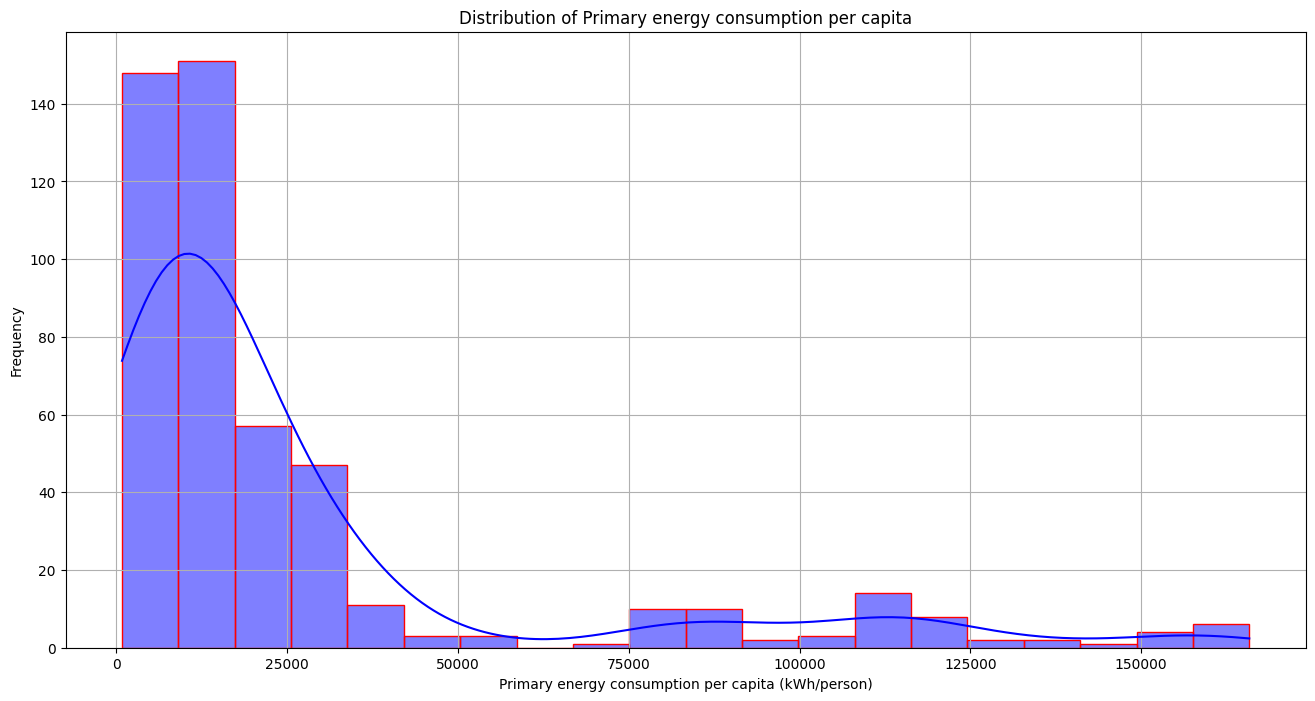

In [10]:
#Plot the histogram and distribution plot together
plt.figure(figsize=(16, 8))
sns.histplot(North_america_df['Primary energy consumption per capita (kWh/person)'],
             bins=20,  kde=True, color='blue', edgecolor='red')
plt.xlabel('Primary energy consumption per capita (kWh/person)')
plt.ylabel('Frequency')
plt.title('Distribution of Primary energy consumption per capita')
plt.grid(True)
plt.show()

The above plot shows a strongly skewed distribution to the right, with the majority of countries having relatively low primary energy consumption per capita, as represented by the tall bars on the left side of the plot.
The top bar reflects a significant number of countries, with primary energy consumption per capita ranging from 0 to 25,000 kWh.As energy consumption per capita grows, the height of the bars decreases, showing that fewer countries are in the higher consumption range.There is a large tail on the right side of the plot, indicating that a small number of countries have extremely high primary energy consumption per capita, ranging from approximately 75,000 kWh/person to 150,000 kWh.

A bar plot with distribution is a suitable visualization choice for displaying the primary energy consumption per capita data as it shows the frequency or count of observations (countries/regions) for different ranges of primary energy consumption per capita values. This allows us to see the overall distribution shape and identify any clusters or outliers in the data.

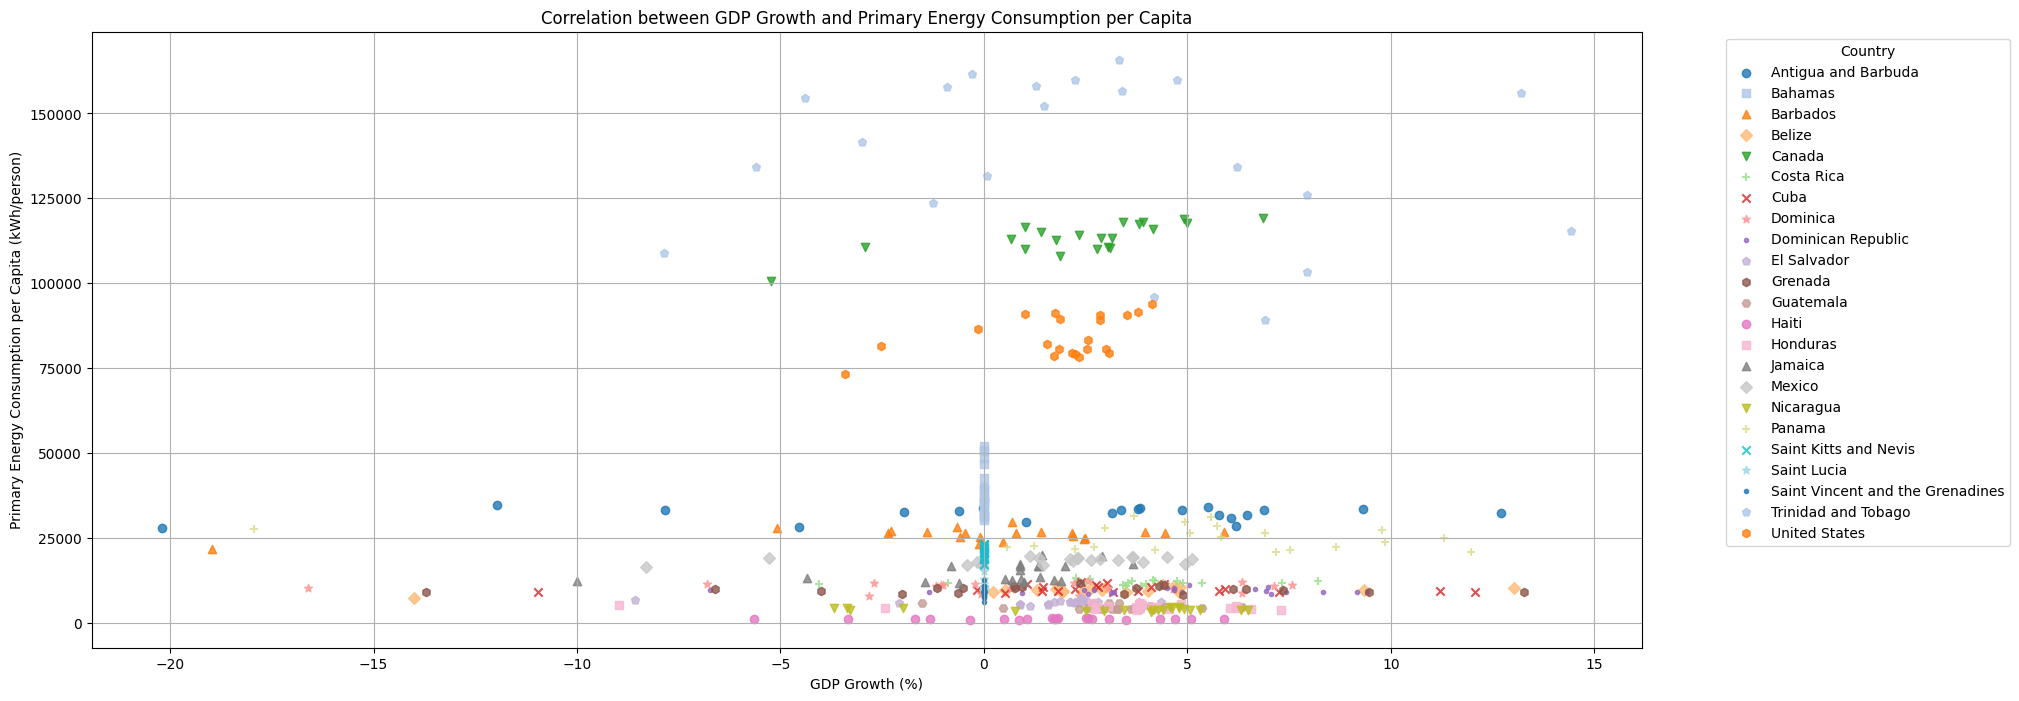

In [11]:
# Extract the columns for GDP growth, primary energy consumption per capita, and country
gdp_growth = North_america_df['gdp_growth']
energy_consumption_per_capita = North_america_df['Primary energy consumption per capita (kWh/person)']
countries = North_america_df.index.get_level_values('Entity')

# Create a dictionary to map countries to unique markers and colors
country_marker_map = {}
country_color_map = {}
unique_countries = countries.unique()
markers = ['o', 's', '^', 'D', 'v', '+', 'x', '*', '.', 'p', 'h', 'H']        # Different marker styles
colors = plt.cm.tab20.colors            # Using the tab20 colormap for a variety of distinct colors
for i, country in enumerate(unique_countries):
    country_marker_map[country] = markers[i % len(markers)]   # Cycle through markers if more countries than markers
    country_color_map[country] = colors[i % len(colors)]      # Cycle through colors if more countries than colors

# Create the scatter plot, using different markers and colors for each country
plt.figure(figsize=(20, 8))
for country in unique_countries:
    country_data = North_america_df.loc[country]
    plt.scatter(country_data['gdp_growth'], country_data['Primary energy consumption per capita (kWh/person)'],
                marker=country_marker_map[country], color=country_color_map[country], alpha=0.8, label=country)
plt.title('Correlation between GDP Growth and Primary Energy Consumption per Capita')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.grid(True)

# Move legend outside the plot box
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


Question: Is there a correlation between energy consumption per capita and its economic growth (GDP growth)?

I'm investigating relationships between variables so scatter plot will be suitable for it.

This graph shows the relationship between a country's GDP growth rate and primary energy usage per capita.
The x-axis shows the GDP growth rate (in percentage), which ranges from negative (economic contraction)to positive(economic growth). The y-axis represents primary energy usage per person (kWh/person).
Each data point on the scatter plot represents a specific country and is colored differently to make it easier to identify. The distribution of these data demonstrates that countries with greater GDP growth rates tend to have higher energy consumption per capita, and vice versa.
The overall trend indicates a positive association, however,certain countries diverge from this pattern. Some countries have relatively high energy consumption despite poor or negative GDP growth, while others have relatively low.

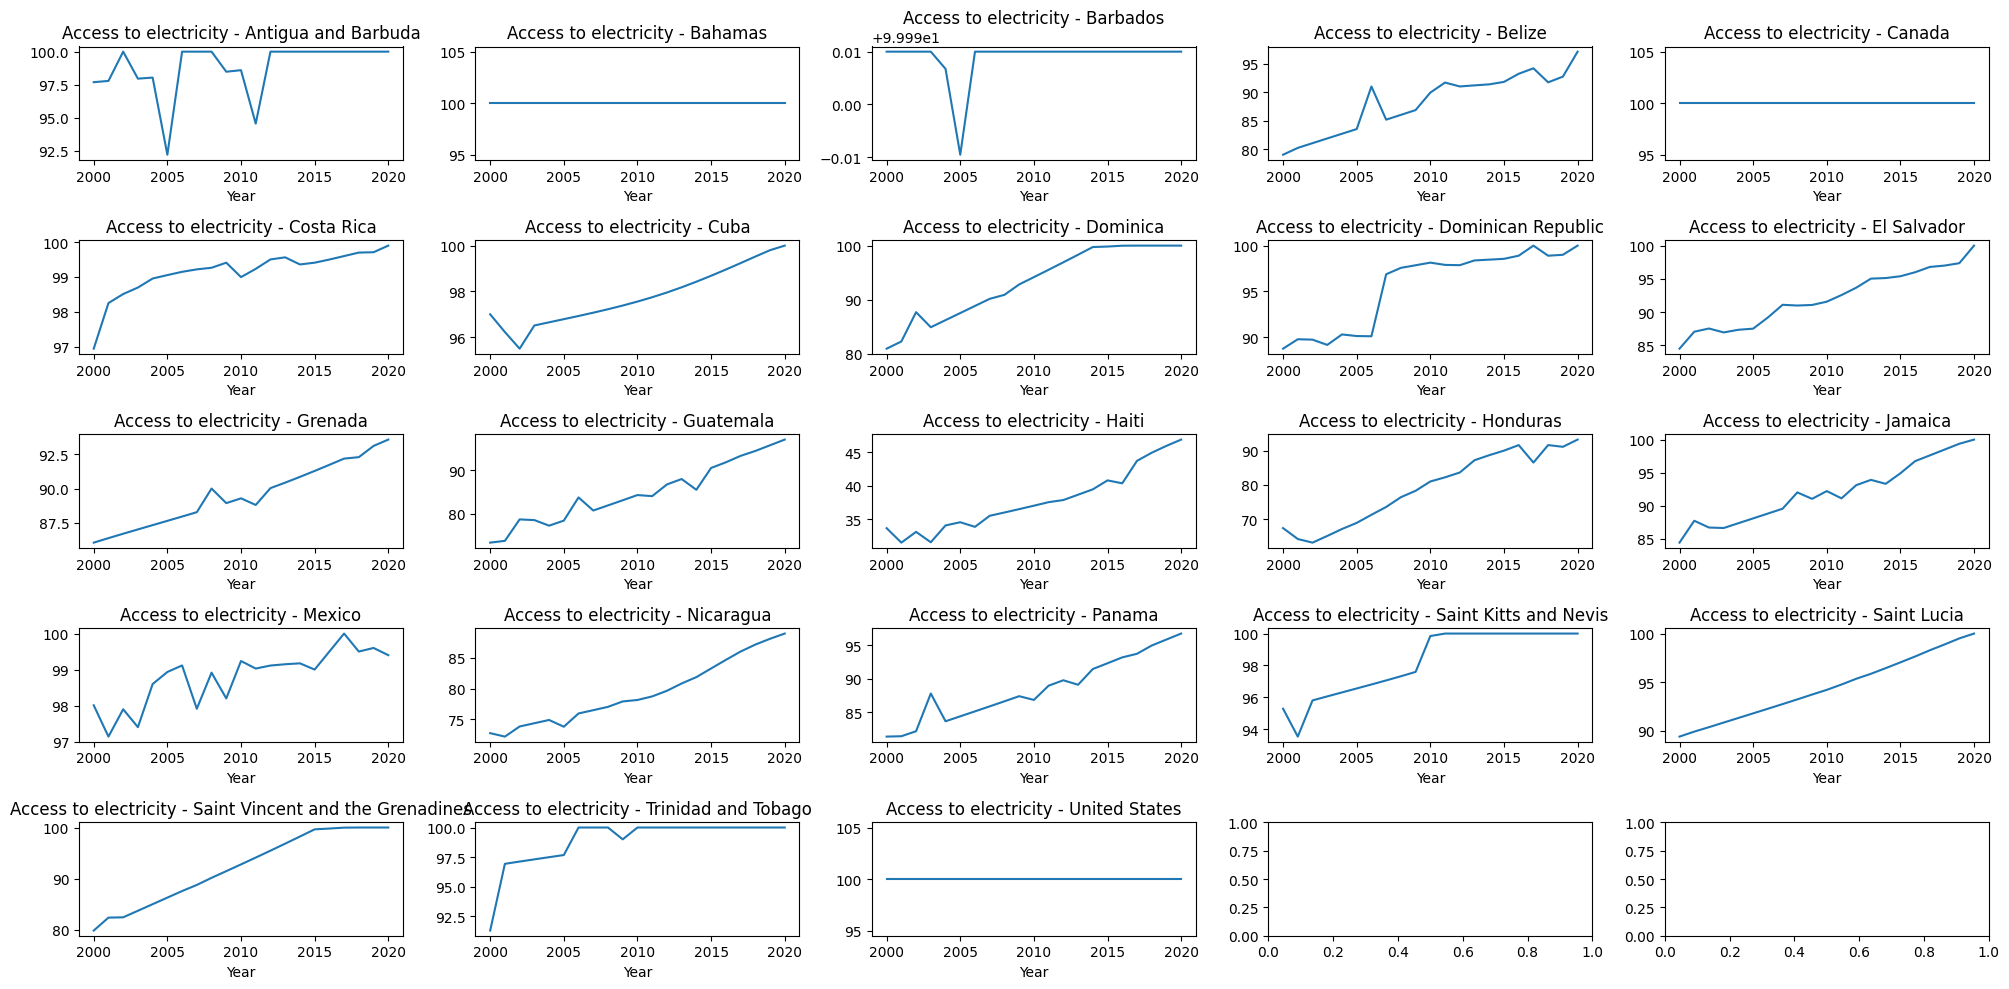

In [12]:
access_to_electricity = North_america_df['Access to electricity (% of population)']
# Select unique countries from the index
countries = access_to_electricity.index.get_level_values('Entity').unique()

# Set up the subplot layout
num_rows = 5  # Number of rows of subplots
num_cols = 5  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    country_data = access_to_electricity.loc[country]
    if num_rows == 1 or num_cols == 1:
        country_data.plot(kind='line', ax=axes[i], title=f'Access to electricity - {country}')
    else:
        country_data.plot(kind='line', ax=axes[row, col], title=f'Access to electricity - {country}')

# Adjust layout
plt.tight_layout()
plt.show()

This plot shows the trend of access to electricity as a percentage of the total population over time (from 2000 to 2020) for various countries in the Caribbean and Central American regions.
Most major countries, including Canada, United state have relatively high and consistent access to power, hovering around 100% during the time.
Haiti has by far the lowest access, with only about 40% expected by 2020, indicating severe electrical access deficits when compared to its neighbors.
Jamaica Panama, the Dominican Republic also showed steady improvement, reaching near-universal access around 95-100% by 2020 after being in the 70%-90% range in 2000.


This visualization efficiently uses multiple line charts to display time-series data for "Access to electricity (% of population)" across various countries. Line charts are an excellent choice for illustrating trends and patterns in variables across time. The addition of multiple graphs allows for a comparative analysis of power access levels and trends within a given region.Given the importance of electricity access as a development indicator, this visualization provides useful insights into the current state and evolution of electrification in the specified region.


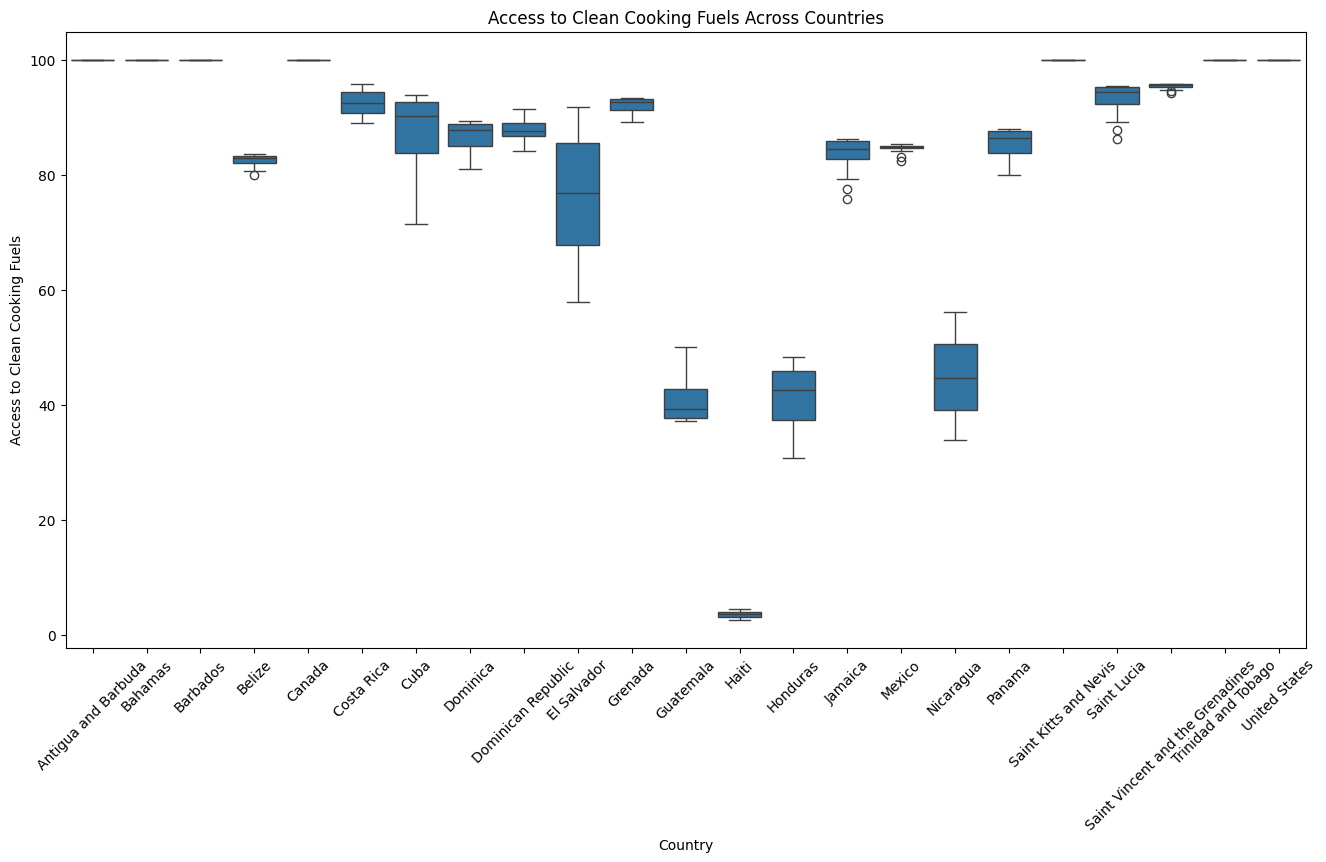

In [13]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=North_america_df, x='Entity', y='Access to clean fuels for cooking')
plt.title('Access to Clean Cooking Fuels Across Countries')
plt.xlabel('Country')
plt.ylabel('Access to Clean Cooking Fuels')
plt.xticks(rotation=45)
plt.show()


This box plot likely shows the distribution of access to clean cooking fuels across various countries.
The horizontal axis (X-axis) represents countries and
the vertical axis (Y-axis) represents a score indicating access to clean cooking fuels (higher values represent greater access).
The box itself contains the middle half of the data (interquartile range). The line in the middle of the box represents the median (the 50th percentile, which divides the data in half). The whiskers extend from the box to the lowest and highest data points within 1.5 times the interquartile range. Any data points beyond the whiskers are considered outliers and are plotted individually.

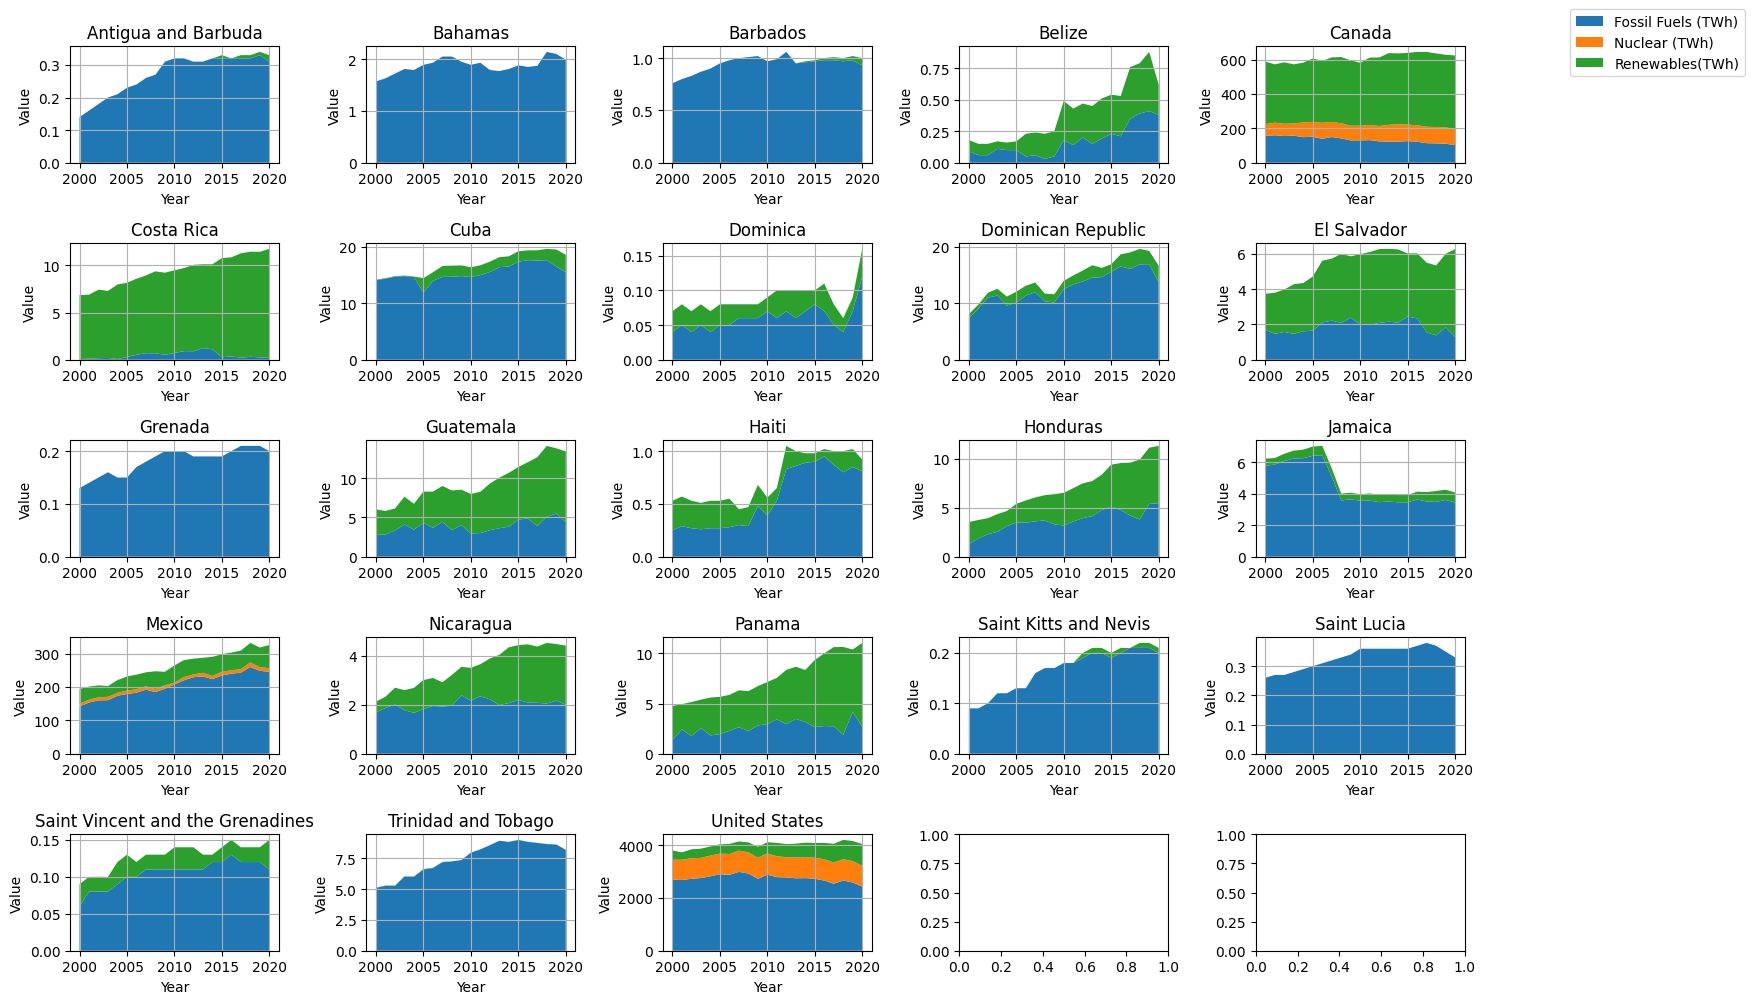

In [14]:
# Select relevant columns for CO2 emissions and electricity generation from different sources
co2_emissions = North_america_df['Value_co2_emissions_kt_by_country']
electricity_fossil_fuels = North_america_df['Electricity from fossil fuels (TWh)']
electricity_nuclear = North_america_df['Electricity from nuclear (TWh)']
electricity_renewables = North_america_df['Electricity from renewables (TWh)']


# Set up the subplot layout
num_rows = 5  # Number of rows of subplots
num_cols = 5  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    if country in North_america_df.index:
        country_data = North_america_df.loc[country]
        years = country_data.index.get_level_values('Year')
        # Stack the energy sources vertically
        stacked_data = np.vstack([electricity_fossil_fuels.loc[country], electricity_nuclear.loc[country], electricity_renewables.loc[country]])
        # Plot the stacked area chart
        axes[row, col].stackplot(years, stacked_data, labels=['Fossil Fuels (TWh)', 'Nuclear (TWh)', 'Renewables(TWh)'])
        axes[row, col].set_title(f'{country}')
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('Value')
        axes[row, col].grid(True)

# Create a single legend for all the subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()

This visualization offers a regional perspective on energy supply patterns. It reveals a common reliance on fossil fuels among the depicted countries. However, the adoption of nuclear and renewable alternatives varies considerably across these nations.

The countries' total energy supply levels differ greatly, with the United States having the greatest at over 4,000 TWh, while tiny nations like Saint Lucia and Saint Kitts and Nevis have far lower levels, around 1 TWh.
Most countries continue to rely heavily on fossil fuels (blue bars), however,
 some, such as Canada and Costa Rica, have improved in adopting renewable energy sources (green bars).
Nuclear power (orange bars) plays an important role in a few countries, such as the United States and Canada, but is missing or insignificant in many others.

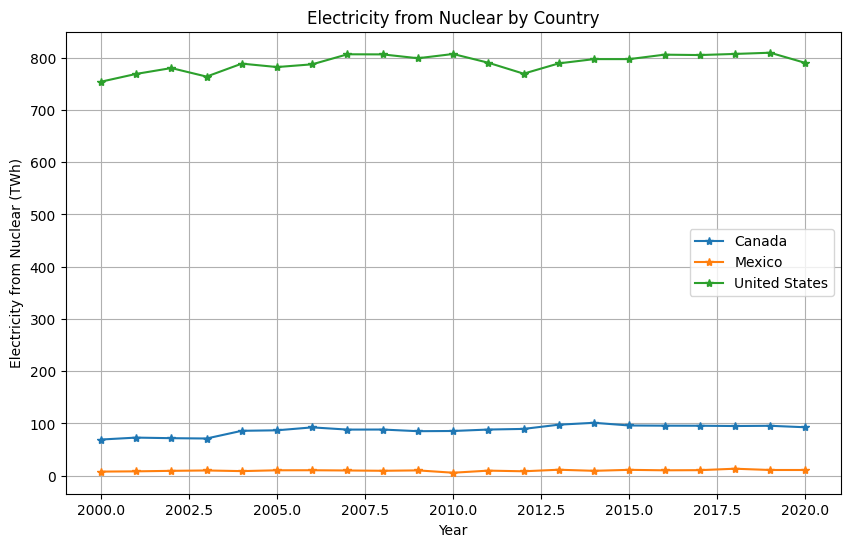

In [15]:
# Selecting countries with non-zero values for electricity from nuclear
countries_with_nuclear = North_america_df[North_america_df['Electricity from nuclear (TWh)'] > 10].index.get_level_values('Entity').unique()

# Plotting for each country with non-zero values for electricity from nuclear
plt.figure(figsize=(10, 6))
for country in countries_with_nuclear:
    country_data = North_america_df.loc[country]
    years = country_data.index.get_level_values('Year')
    electricity_nuclear = country_data['Electricity from nuclear (TWh)']
    plt.plot(years, electricity_nuclear, label=country, marker="*")

# Adding labels and legend
plt.title('Electricity from Nuclear by Country')
plt.xlabel('Year')
plt.ylabel('Electricity from Nuclear (TWh)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

This graph shows the electricity generated from nuclear power sources in North America by three countries: Canada, Mexico, and the United States, over the period from 2000 to 2020.The y-axis displays the amount of power generated by nuclear sources, measured in TWh (terawatt-hours), and the x-axis indicates the years.Throughout the provided time period, the United States has consistently produced the most nuclear-generated electricity of the three countries. The trend line for the United States (green) shows very consistent and high levels of nuclear energy generation, ranging around 800 TWh.
Canada's nuclear electricity generation (blue line) has been consistent throughout the years at roughly 90-100 TWh, which is much lower than the US but greater than Mexico (orange line) has generated less nuclear electricity  Throughout the period, its nuclear electricity generation has been less than 20 TWh.

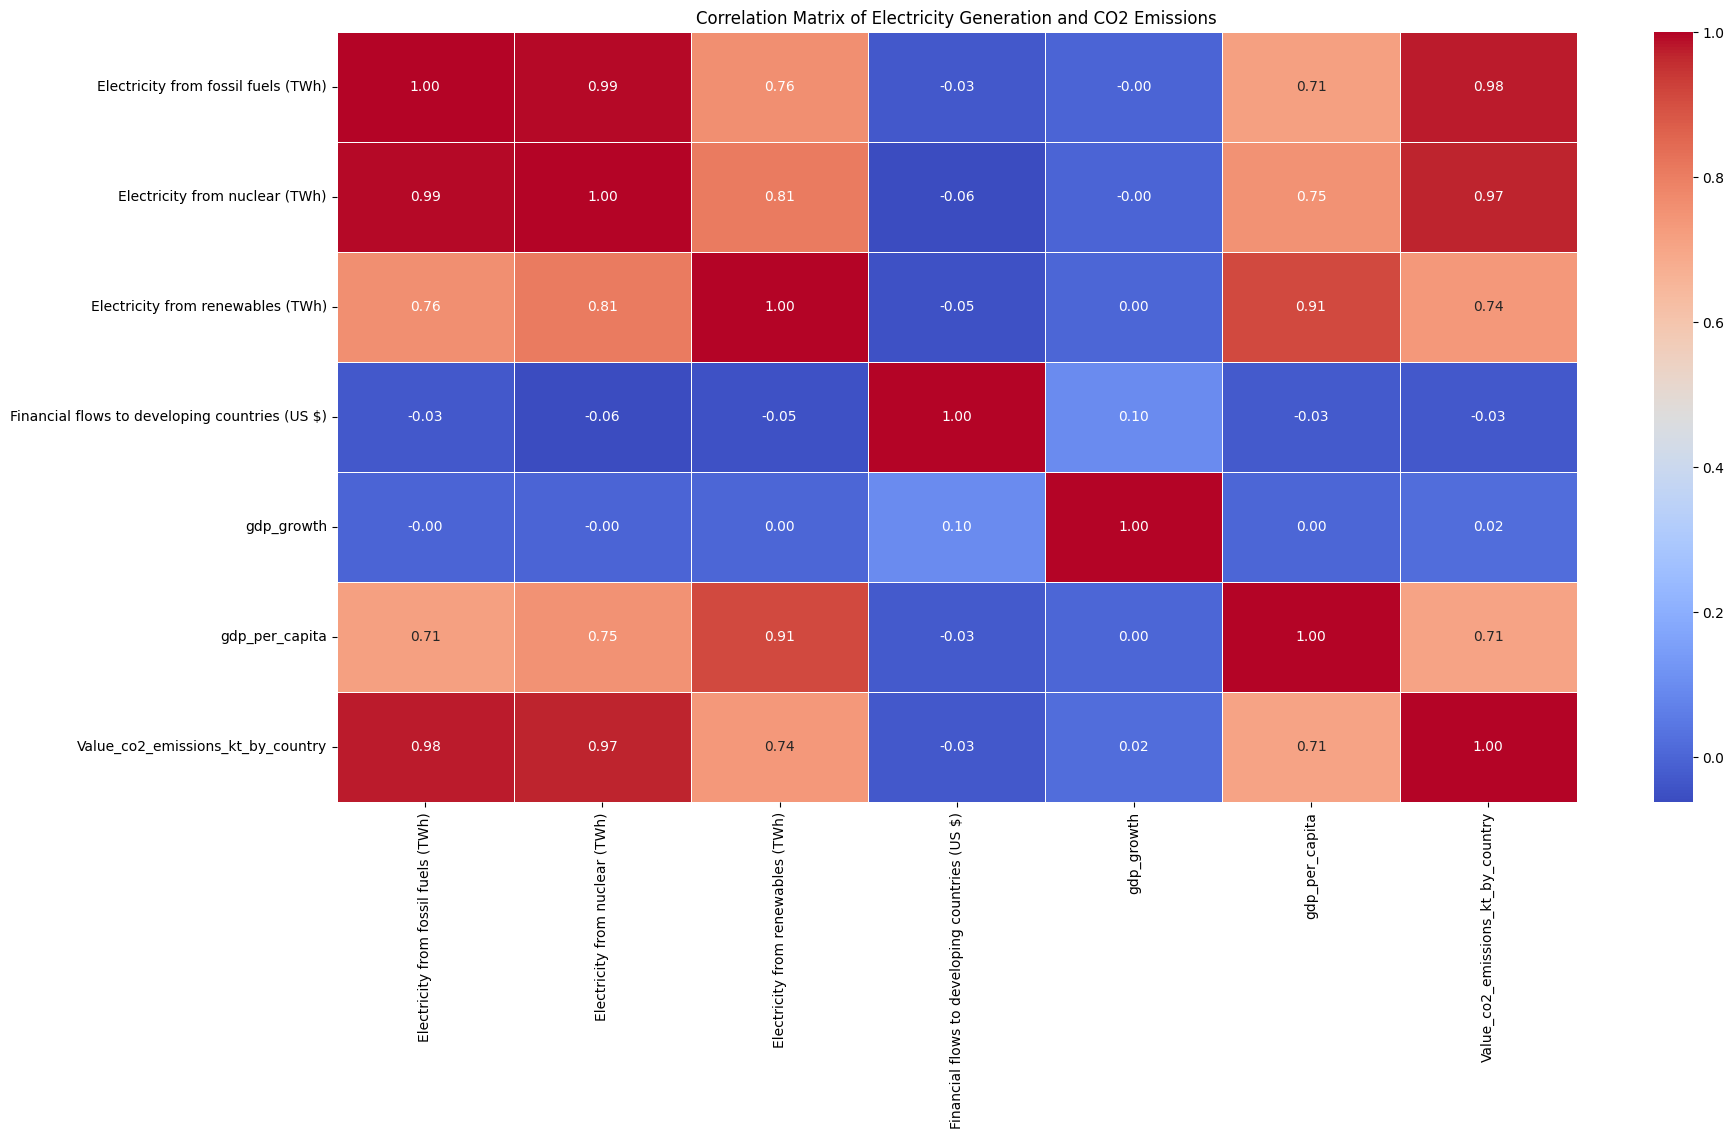

In [16]:
# Select relevant columns for analysis
relevant_data =North_america_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Financial flows to developing countries (US $)', 'gdp_growth', 'gdp_per_capita'
                       ,'Value_co2_emissions_kt_by_country']]


# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Electricity Generation and CO2 Emissions')
plt.show()

The correlation matrix shows the relationships between various variables related to electricity generation sources, CO2 emissions, financial flows to developing countries, and economic indicators like GDP growth and GDP per capita.



*   Electricity generation from fossil fuels and from nuclear sources are highly positively correlated (0.97) , moderately correlated (0.74) with renewables,in total CO2 emissions by country. This suggests fossil fuels are a major driver of emissions.
*   GDP growth has a negligible to slightly negative correlation with most variables, showing small positive correlation (0.02) with financial flows, that suggests growth may not directly relate to electricity mix or emissions.


* GDP per capita is moderately positively correlated with electricity from all sources, particularly fossil fuels (0.71) and nuclear (0.75), indicating wealthier nations tend to consume more electricity.   
* The no correlation (0.00) between GDP growth and GDP per capita, inidates potential challenges in balancing growth and income distribution





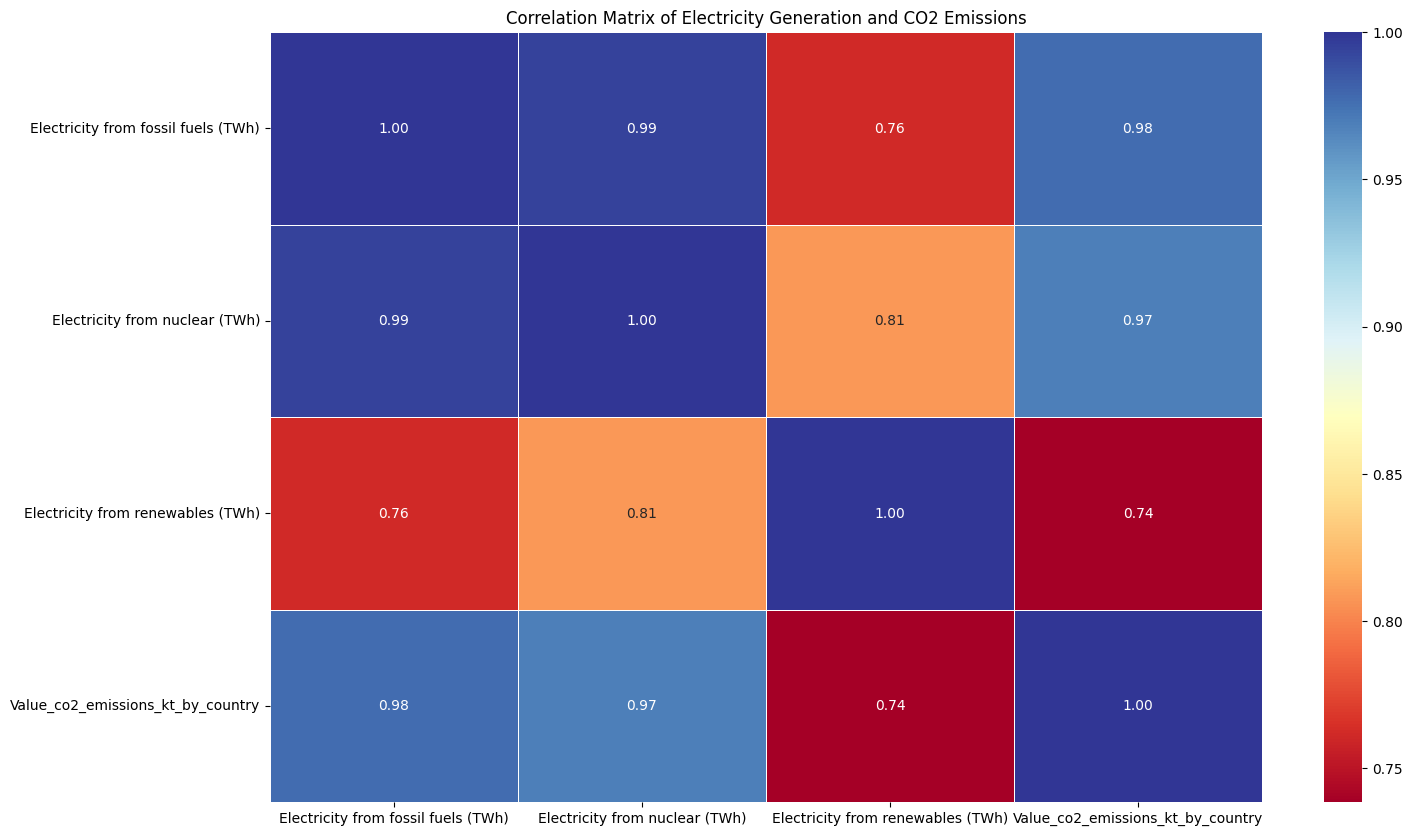

In [17]:
# Select relevant columns for analysis
relevant_data = North_america_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country']]


# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=.7)
plt.title('Correlation Matrix of Electricity Generation and CO2 Emissions')
plt.show()

Analysis of the correlation matrix reveals a strong positive association (0.98-0.99) between fossil fuel electricity generation and CO2 emissions, indicating that countries hat rely heavily  on fossil fuels have higher emissions. Nuclear power exhibits a moderate positive correlation (0.81-0.97), suggesting lower emissions than fossil fuels, but not completely emission-free. Renewables display the least positive correlation (0.74-0.76) with CO2 emissions,  indicating their potential as cleaner energy sources. Notably, the correlation matrix reveals a strong positive correlation (near 1) between all electricity generation sources. This suggests an interconnected energy system where countries utilize a diverse mix of generation methods to meet their energy demands.
Overall, this matrix emphasizes the considerable impact of fossil fuel-based energy generation on CO2 emissions and the potential benefits of shifting to cleaner sources such as renewables and nuclear power to reduce emissions while meeting energy demands.

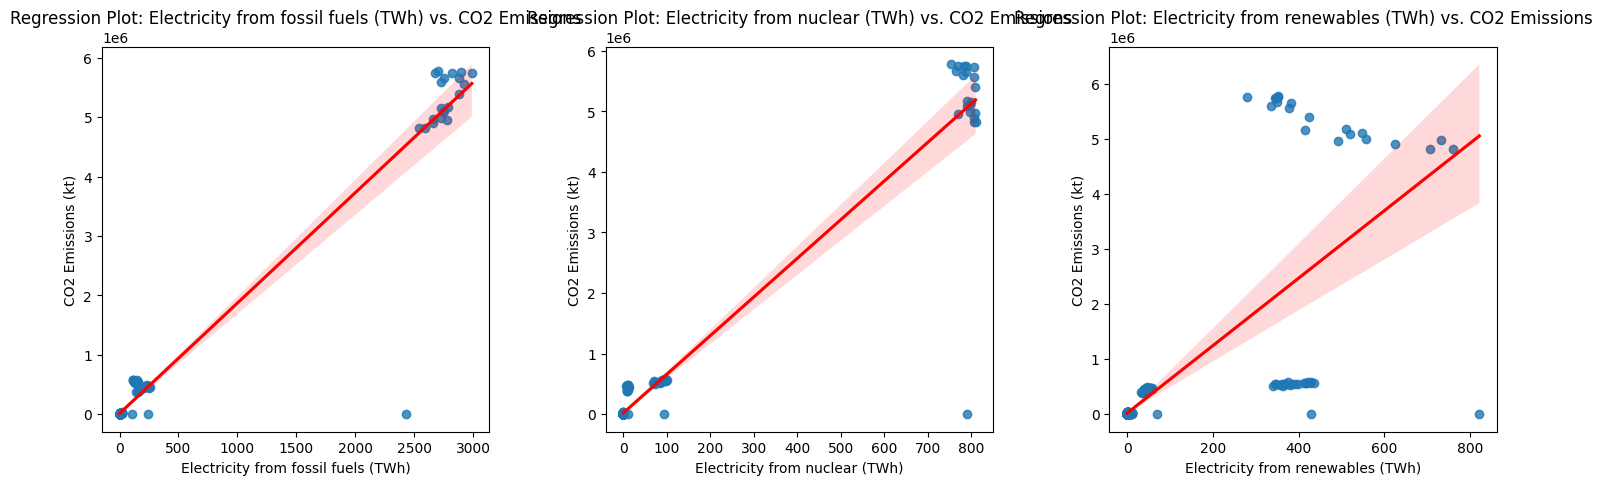

In [18]:
# for subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Iterate over each predictor variable and create a regression plot
predictor_vars = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']

for idx, var in enumerate(predictor_vars):
    # Regression plot with scatter points and regression line
    sns.regplot(x=var, y='Value_co2_emissions_kt_by_country', data= North_america_df, ax=axes[idx], line_kws={'color': 'red'})

    # Set axis labels and title
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('CO2 Emissions (kt)')
    axes[idx].set_title(f'Regression Plot: {var} vs. CO2 Emissions')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

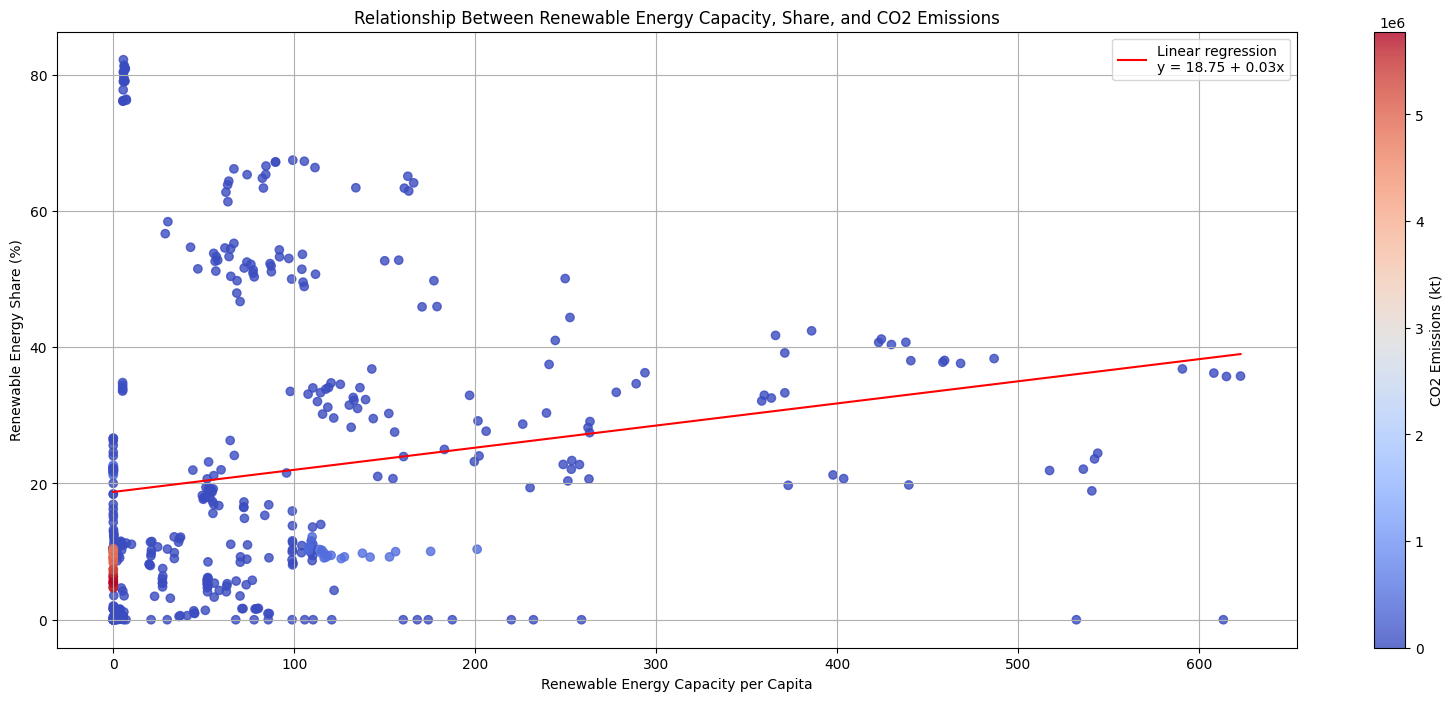

In [19]:

# Define variables
renewable_capacity = North_america_df['Renewable-electricity-generating-capacity-per-capita']
renewable_share = North_america_df['Renewable energy share in the total final energy consumption (%)']
co2_emissions = North_america_df['Value_co2_emissions_kt_by_country']

# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(renewable_capacity, renewable_share)

# Create scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(renewable_capacity, renewable_share, c=co2_emissions, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='CO2 Emissions (kt)')
plt.xlabel('Renewable Energy Capacity per Capita')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Relationship Between Renewable Energy Capacity, Share, and CO2 Emissions')

# Add a linear regression line
x_vals = np.array([min(renewable_capacity), max(renewable_capacity)])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r-', label=f'Linear regression\ny = {intercept:.2f} + {slope:.2f}x')
plt.legend()

plt.grid(True)
plt.show()


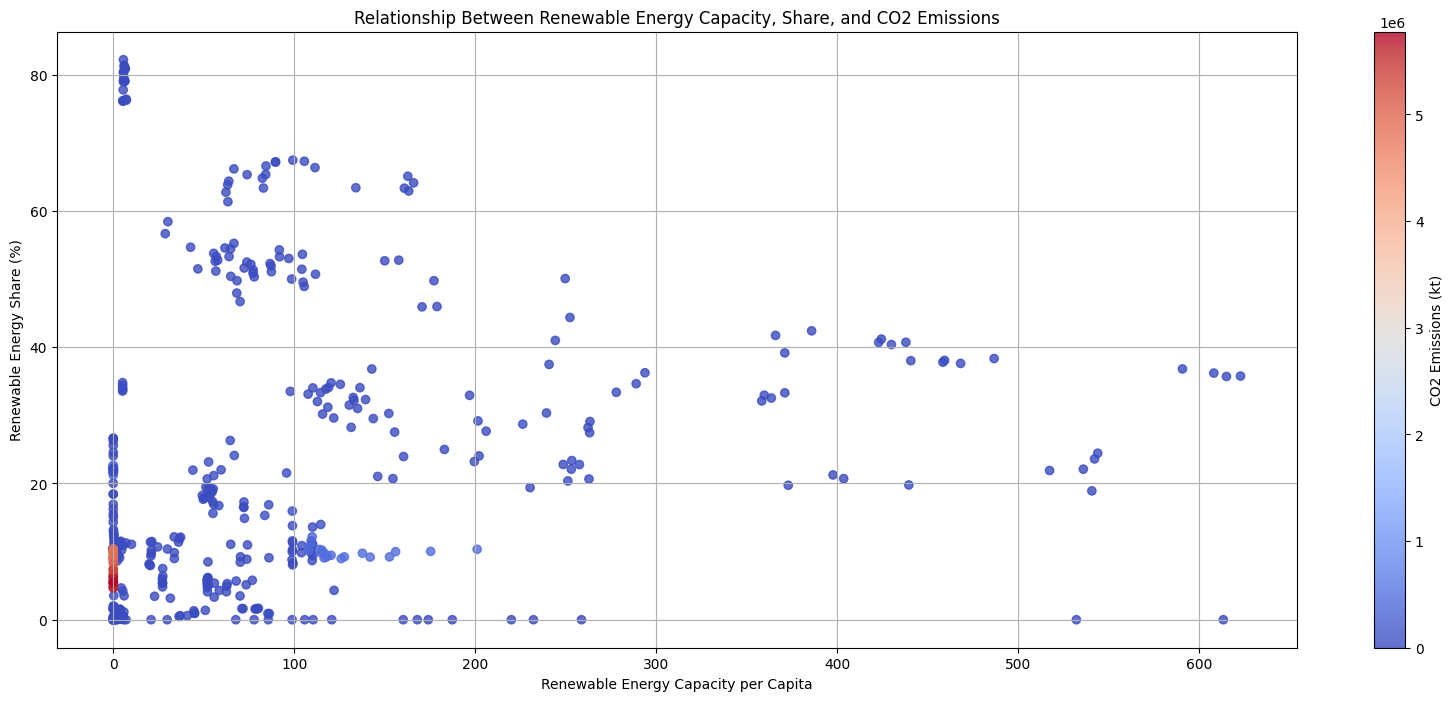

In [20]:
# Define variables
renewable_capacity = North_america_df['Renewable-electricity-generating-capacity-per-capita']
renewable_share = North_america_df['Renewable energy share in the total final energy consumption (%)']
co2_emissions = North_america_df['Value_co2_emissions_kt_by_country']

# Create scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(renewable_capacity, renewable_share, c=co2_emissions, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='CO2 Emissions (kt)')
plt.xlabel('Renewable Energy Capacity per Capita')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Relationship Between Renewable Energy Capacity, Share, and CO2 Emissions')
plt.grid(True)
plt.show()

The x-axis indicates renewable energy capacity per capita, and the y-axis on the left displays renewable energy share (in percentage). On the right, the y-axis shows CO2 emissions (kt). Each data point on the scatter plot represents an individual country.
Countries with higher renewable energy capacity per capita have a greater proportion of renewable energy in their overall energy mix.
In general, there is an inverse link between renewable energy share and CO2 emissions, implying that nations that use more renewable energy have lower CO2 emissions.
However, there is significant variation among countries, with some outliers having relatively high renewable energy capacity or share but still exhibiting high CO2 emissions, and vice versa.
The data suggests a connection between renewable energy use and CO2 emissions; however, a significant spread is observed across countries. Some outliers might possess high renewable capacity but lack efficient infrastructure for integration into the energy grid, leading to continued reliance on fossil fuels. Conversely, other outliers might have limited renewable resources but have adopted stricter emission control measures for existing power plants.

In [21]:
# Select the required features and target values
X = North_america_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]
y = North_america_df['Value_co2_emissions_kt_by_country']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
# (You can use metrics like mean squared error, R-squared, etc.)
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

Model Coefficients: [ 2632.64653286 -2921.61136083   197.0527656 ]
Model Intercept: 10222.61293404107


The magnitude and sign of the coefficients indicate the relationship between each features variables and the target variables(in this case CO₂ emission).
The positive coefficient means as the feature variable increases, the target variable tends to increase. The negative coefficient indicates that as the feature variables increases the target variable should also increase.
Therefore, here we can see that as the production of Electricity from nuclear
source increases the emission of CO₂ decreases and the CO₂ emission from the renewal sources is around 10 times less that from fossiles fules.

In [22]:
# Calculate the Mean Squared Error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 =  r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate  Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 9015591873.10823
R-squared: 0.9935387149973578
Root Mean Squared Error (RMSE): 94950.4706313151


R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables.R² ranges from 0 to 1, higher R² values here indicate a better fit of the model to the data.
RMSE is similar to MSE but is in the same units as the target variable. It's more interpretable compared to MSE.

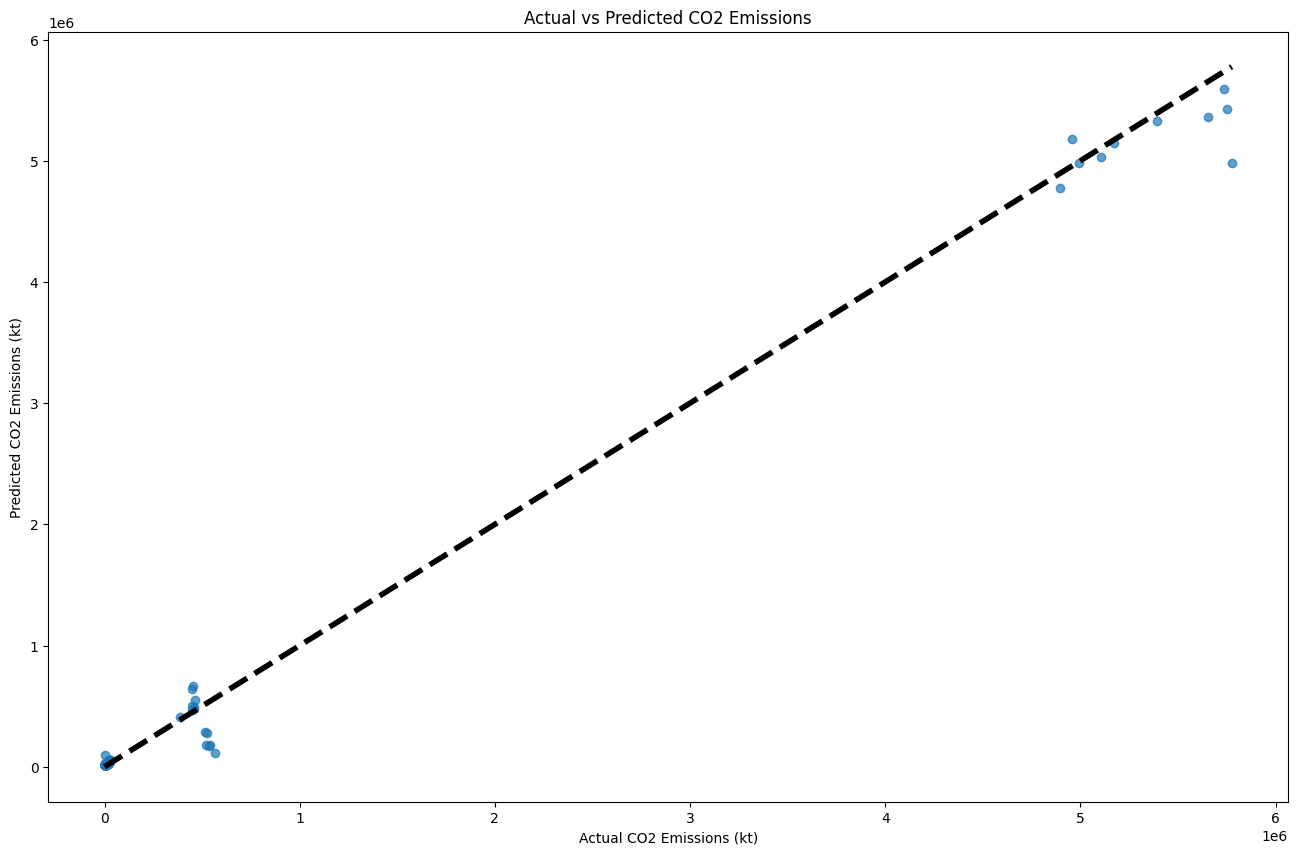

In [23]:
# Plotting actual vs predicted values
plt.figure(figsize=(16, 10))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual CO2 Emissions (kt)')
plt.ylabel('Predicted CO2 Emissions (kt)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

Mean Squared Error: 17607714067.40731
R-squared: 0.9873809218034925


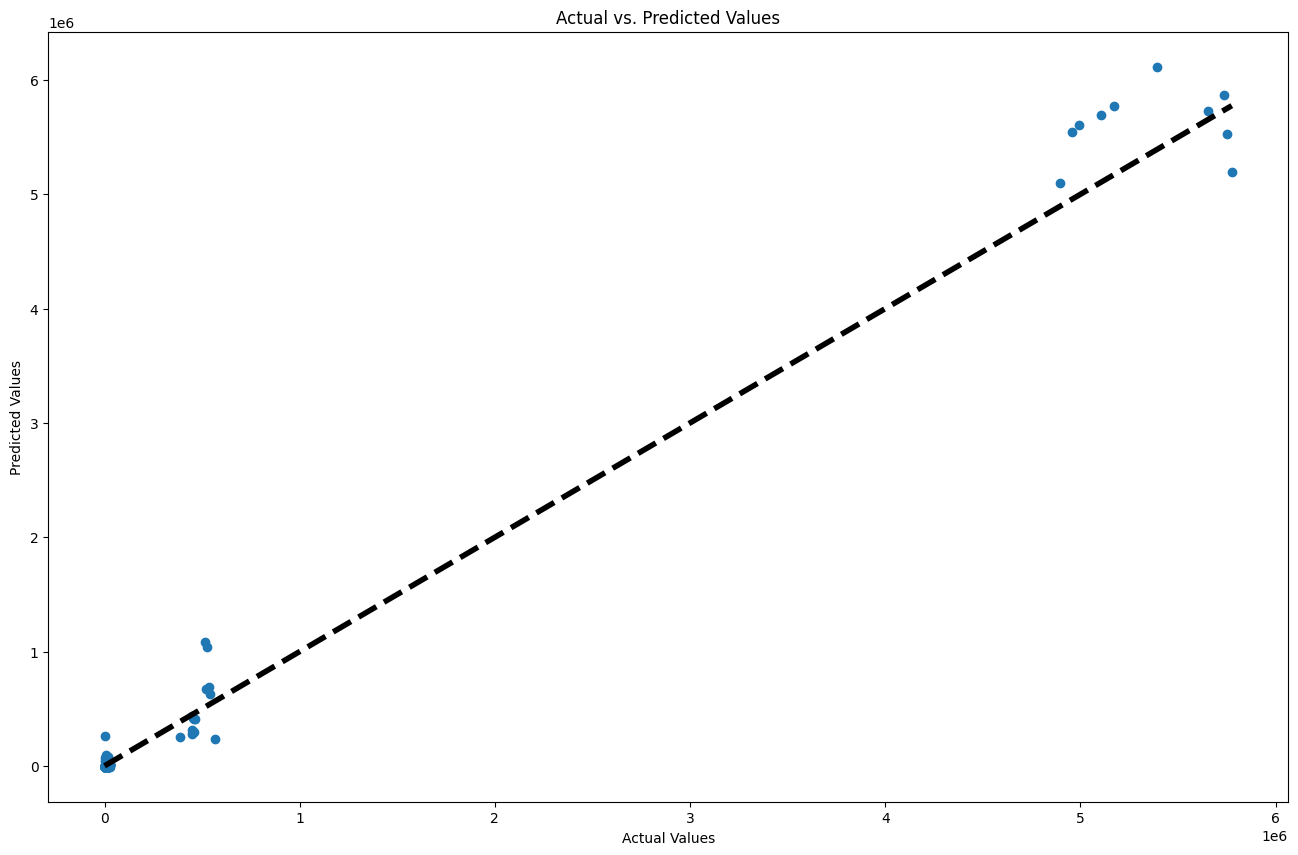

In [24]:

# Create polynomial features (e.g., quadratic features)
poly = PolynomialFeatures(degree=2)  # Specify the degree of the polynomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize the results (actual vs. predicted)
plt.figure(figsize=(16, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

In [25]:
# Initializing Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
# Training the Decision Tree model
dt_regressor.fit(X_train, y_train)
# Predicting on the test set
dt_predictions = dt_regressor.predict(X_test)
# Calculate Mean Squared Error
dt_mse = mean_squared_error(y_test, dt_predictions)
print(" Mean Squared Error:", dt_mse)


# Calculate R-squared (R²)
r2 = r2_score(y_test, dt_predictions)
print("R-squared (R²):", r2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, dt_predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate  Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

 Mean Squared Error: 5163479906.235304
R-squared (R²): 0.9962994425935454
Mean Absolute Error (MAE): 16191.712643913226
Root Mean Squared Error (RMSE): 71857.35805215291


In [26]:
# Initializing Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Training the Random Forest model
rf_regressor.fit(X_train, y_train)
# Predicting on the test set
rf_predictions = rf_regressor.predict(X_test)


# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
# Calculate R-squared (R²)
r2 = r2_score(y_test, rf_predictions)
print("R-squared (R²):", r2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate  Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Random Forest Mean Squared Error: 4170248057.053951
R-squared (R²): 0.997011270961731
Mean Absolute Error (MAE): 15999.066497858534
Root Mean Squared Error (RMSE): 64577.457808851155


**In conclusion::**

A lower RMSE obtained using a Random Forest model compared to other models suggest that the Random Forest model performs better in terms of predicting the target variable.

Working with Asian countries Data set

In [27]:
# Define a list of Asian countries

asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
                   'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                   'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
                   'Myanmar', 'Nepal',  'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar',
                   'Saudi Arabia', 'Singapore','Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
                   'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Yemen']



# Filter the DataFrame to include only Asian countries
asia_df = Energy_df[Energy_df['Entity'].isin(asian_countries)].copy()

# Save the Asia DataFrame to a file
asia_df.to_csv('asia_data.csv', index=False)


Asia_df = pd.read_csv("/content/asia_data.csv")
Asia_df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683

In [28]:
# Set 'Entity' and 'Year' columns as index
Asia_df.set_index(['Entity', 'Year'], inplace=True)
Asia_df.head()

Access to electricity (% of population)  \
Entity      Year                                            
Afghanistan 2000                                 1.613591   
            2001                                 4.074574   
            2002                                 9.409158   
            2003                                14.738506   
            2004                                20.064968   

                  Access to clean fuels for cooking  \
Entity      Year                                      
Afghanistan 2000                                6.2   
            2001                                7.2   
            2002                                8.2   
            2003                                9.5   
            2004                               10.9   

                  Renewable-electricity-generating-capacity-per-capita  \
Entity      Year                                                         
Afghanistan 2000                                               9.22      
            2001                                               8.86      
            2002                                               8.47      
            2003                                               8.09      
            2004                                               7.75      

                  Financial flows to developing countries (US $)  \
Entity      Year                                                   
Afghanistan 2000                                         20000.0   
            2001                                        130000.0   
            2002                                       3950000.0   
            2003                                      25970000.0   
            2004                                             NaN   

                  Renewable energy share in the total final energy consumption (%)  \
Entity      Year                                                                     
Afghanistan 2000                                              44.99                  
            2001                                              45.60                  
            2002                                              37.83                  
            2003                                              36.66                  
            2004                                              44.24                  

                  Electricity from fossil fuels (TWh)  \
Entity      Year                                        
Afghanistan 2000                                 0.16   
            2001                                 0.09   
            2002                                 0.13   
            2003                                 0.31   
            2004                                 0.33   

                  Electricity from nuclear (TWh)  \
Entity      Year                                   
Afghanistan 2000                             0.0   
            2001                             0.0   
            2002                             0.0   
            2003                             0.0   
            2004                             0.0   

                  Electricity from renewables (TWh)  \
Entity      Year                                      
Afghanistan 2000                               0.31   
            2001                               0.50   
            2002                               0.56   
            2003                               0.63   
            2004                               0.56   

                  Low-carbon electricity (% electricity)  \
Entity      Year                                           
Afghanistan 2000                               65.957440   
            2001                               84.745766   
            2002                               81.159424   
            2003                               67.021280   
            2004                               62.921350   

                  Primary energy 

In [29]:
# Fill NaN in each column by 0
Asia_df.fillna(0, inplace=True);

Asia_df.dropna(axis = 1);

# check missing values in columns
Asia_df.isnull().sum()

Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)                            0
gdp_growth                                                          0
gdp_per_capita      

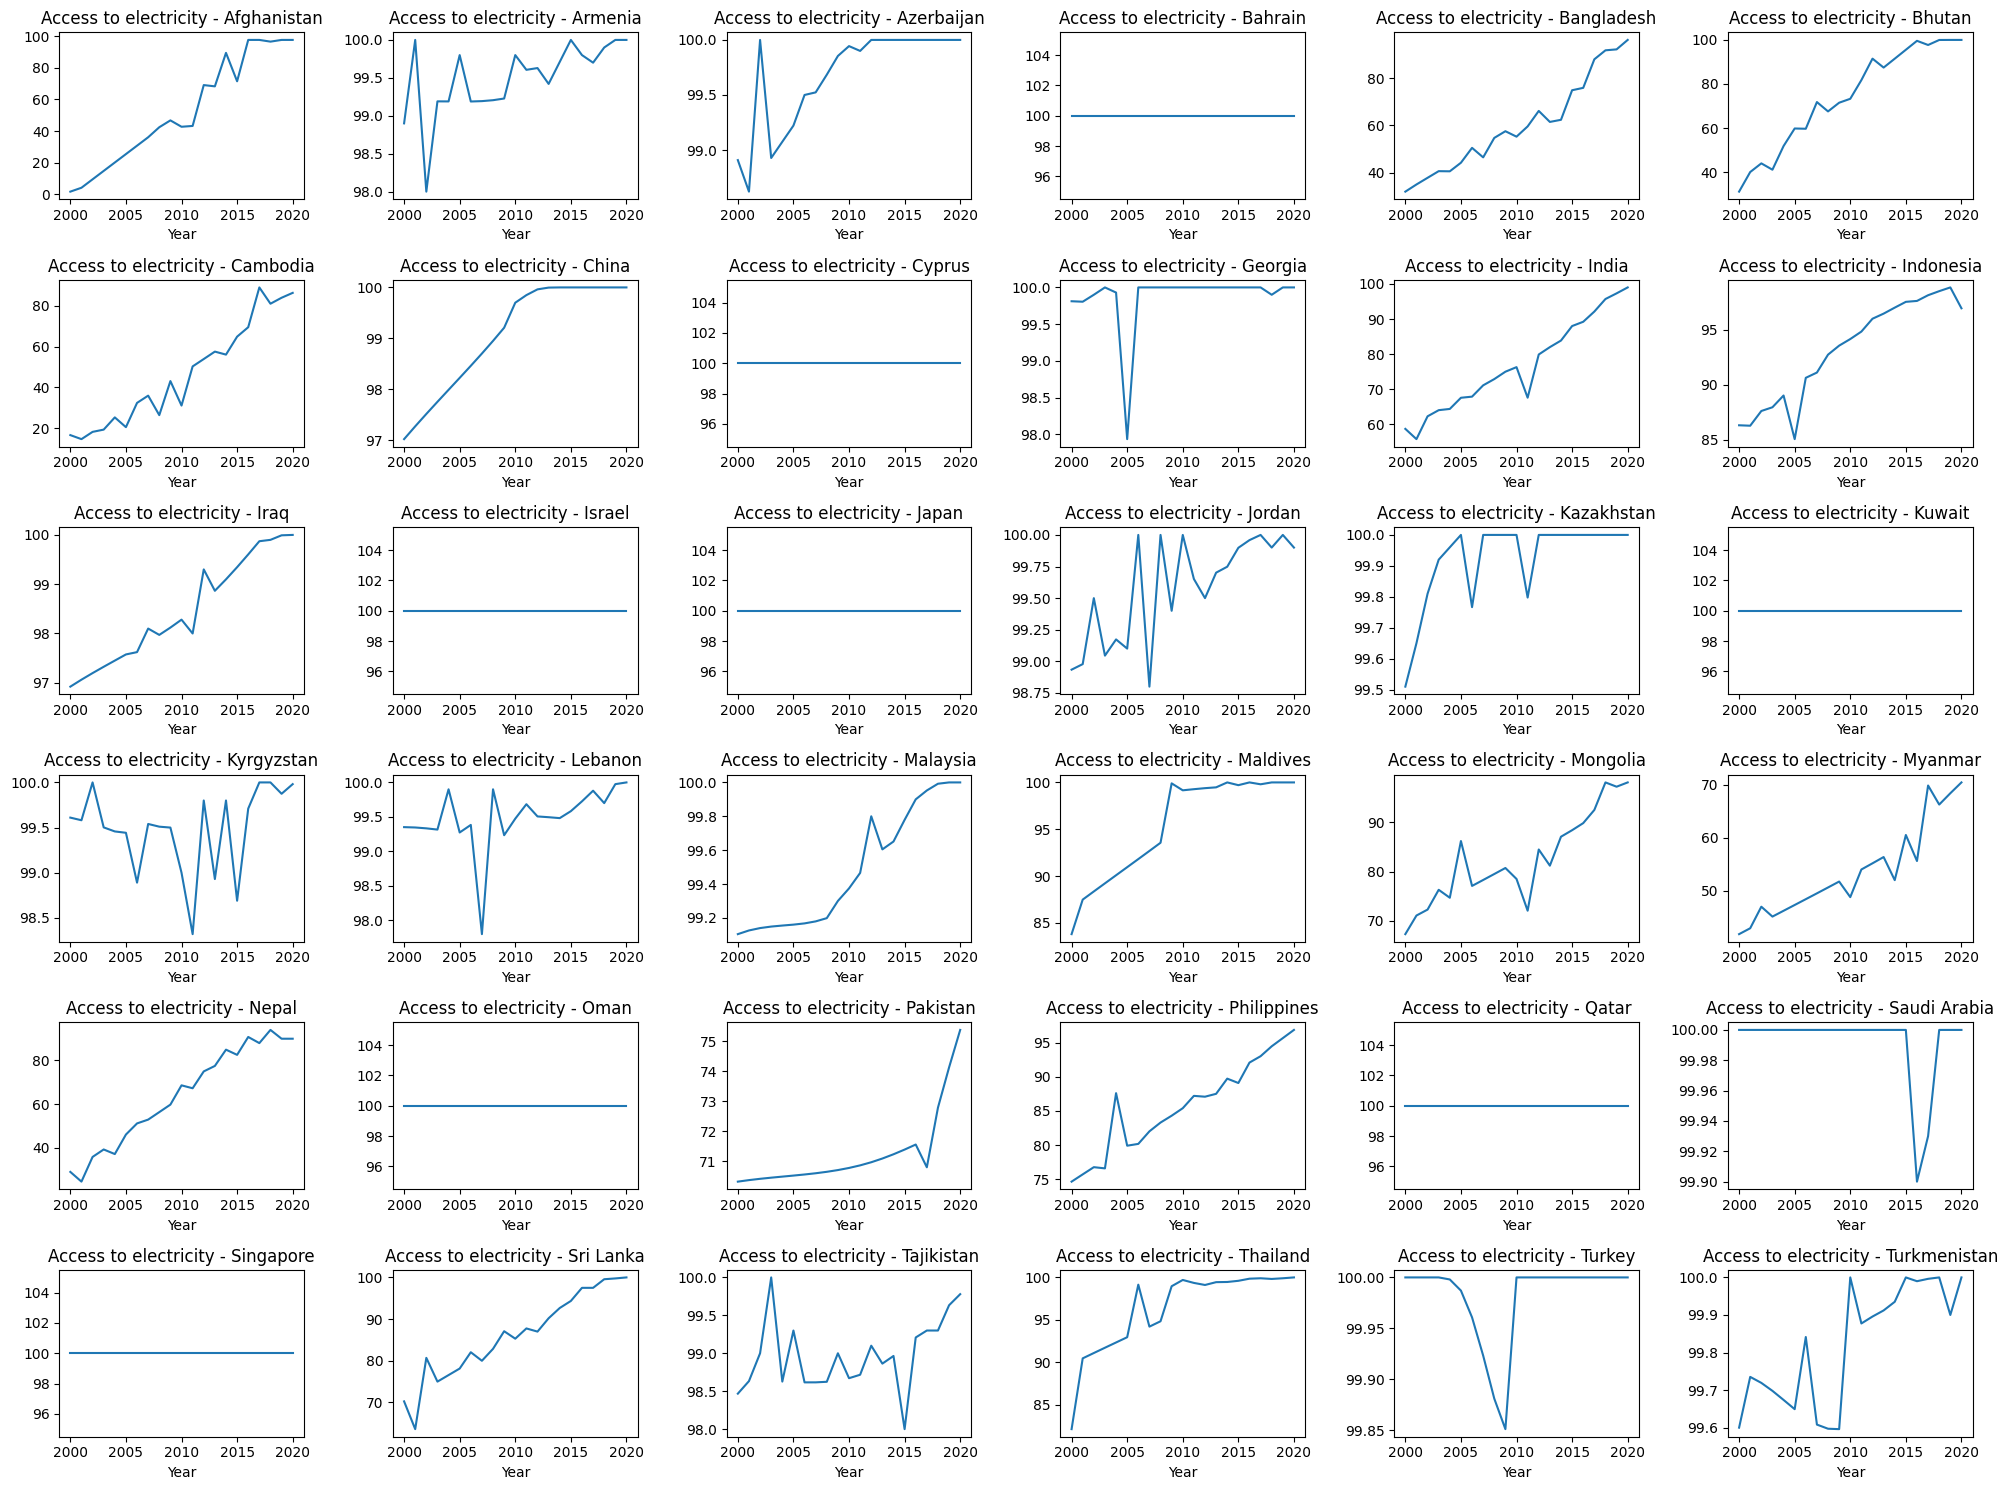

In [30]:
access_to_electricity = Asia_df['Access to electricity (% of population)']
# Select unique countries from the index
countries = access_to_electricity.index.get_level_values('Entity').unique()

# Set up the subplot layout
num_rows = 6  # Number of rows of subplots
num_cols = 6  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    country_data = access_to_electricity.loc[country]
    if num_rows == 1 or num_cols == 1:
        country_data.plot(kind='line', ax=axes[i], title=f'Access to electricity - {country}')
    else:
        country_data.plot(kind='line', ax=axes[row, col], title=f'Access to electricity - {country}')

# Adjust layout
plt.tight_layout()
plt.show()

The graph above shows a line graph of "Access to electricity" percentages for various countries across Asia from 2000 to 2020. It provides an overview of the progress made by different nations in providing access to electricity over the past two decades. Countries like Japan, Singapore, Qatar have full excess to electricity, but some countriel like Iqran, Malaysia, China  have gradually improved overtime and reached the ultimate goal, for 100% excess to electricity.

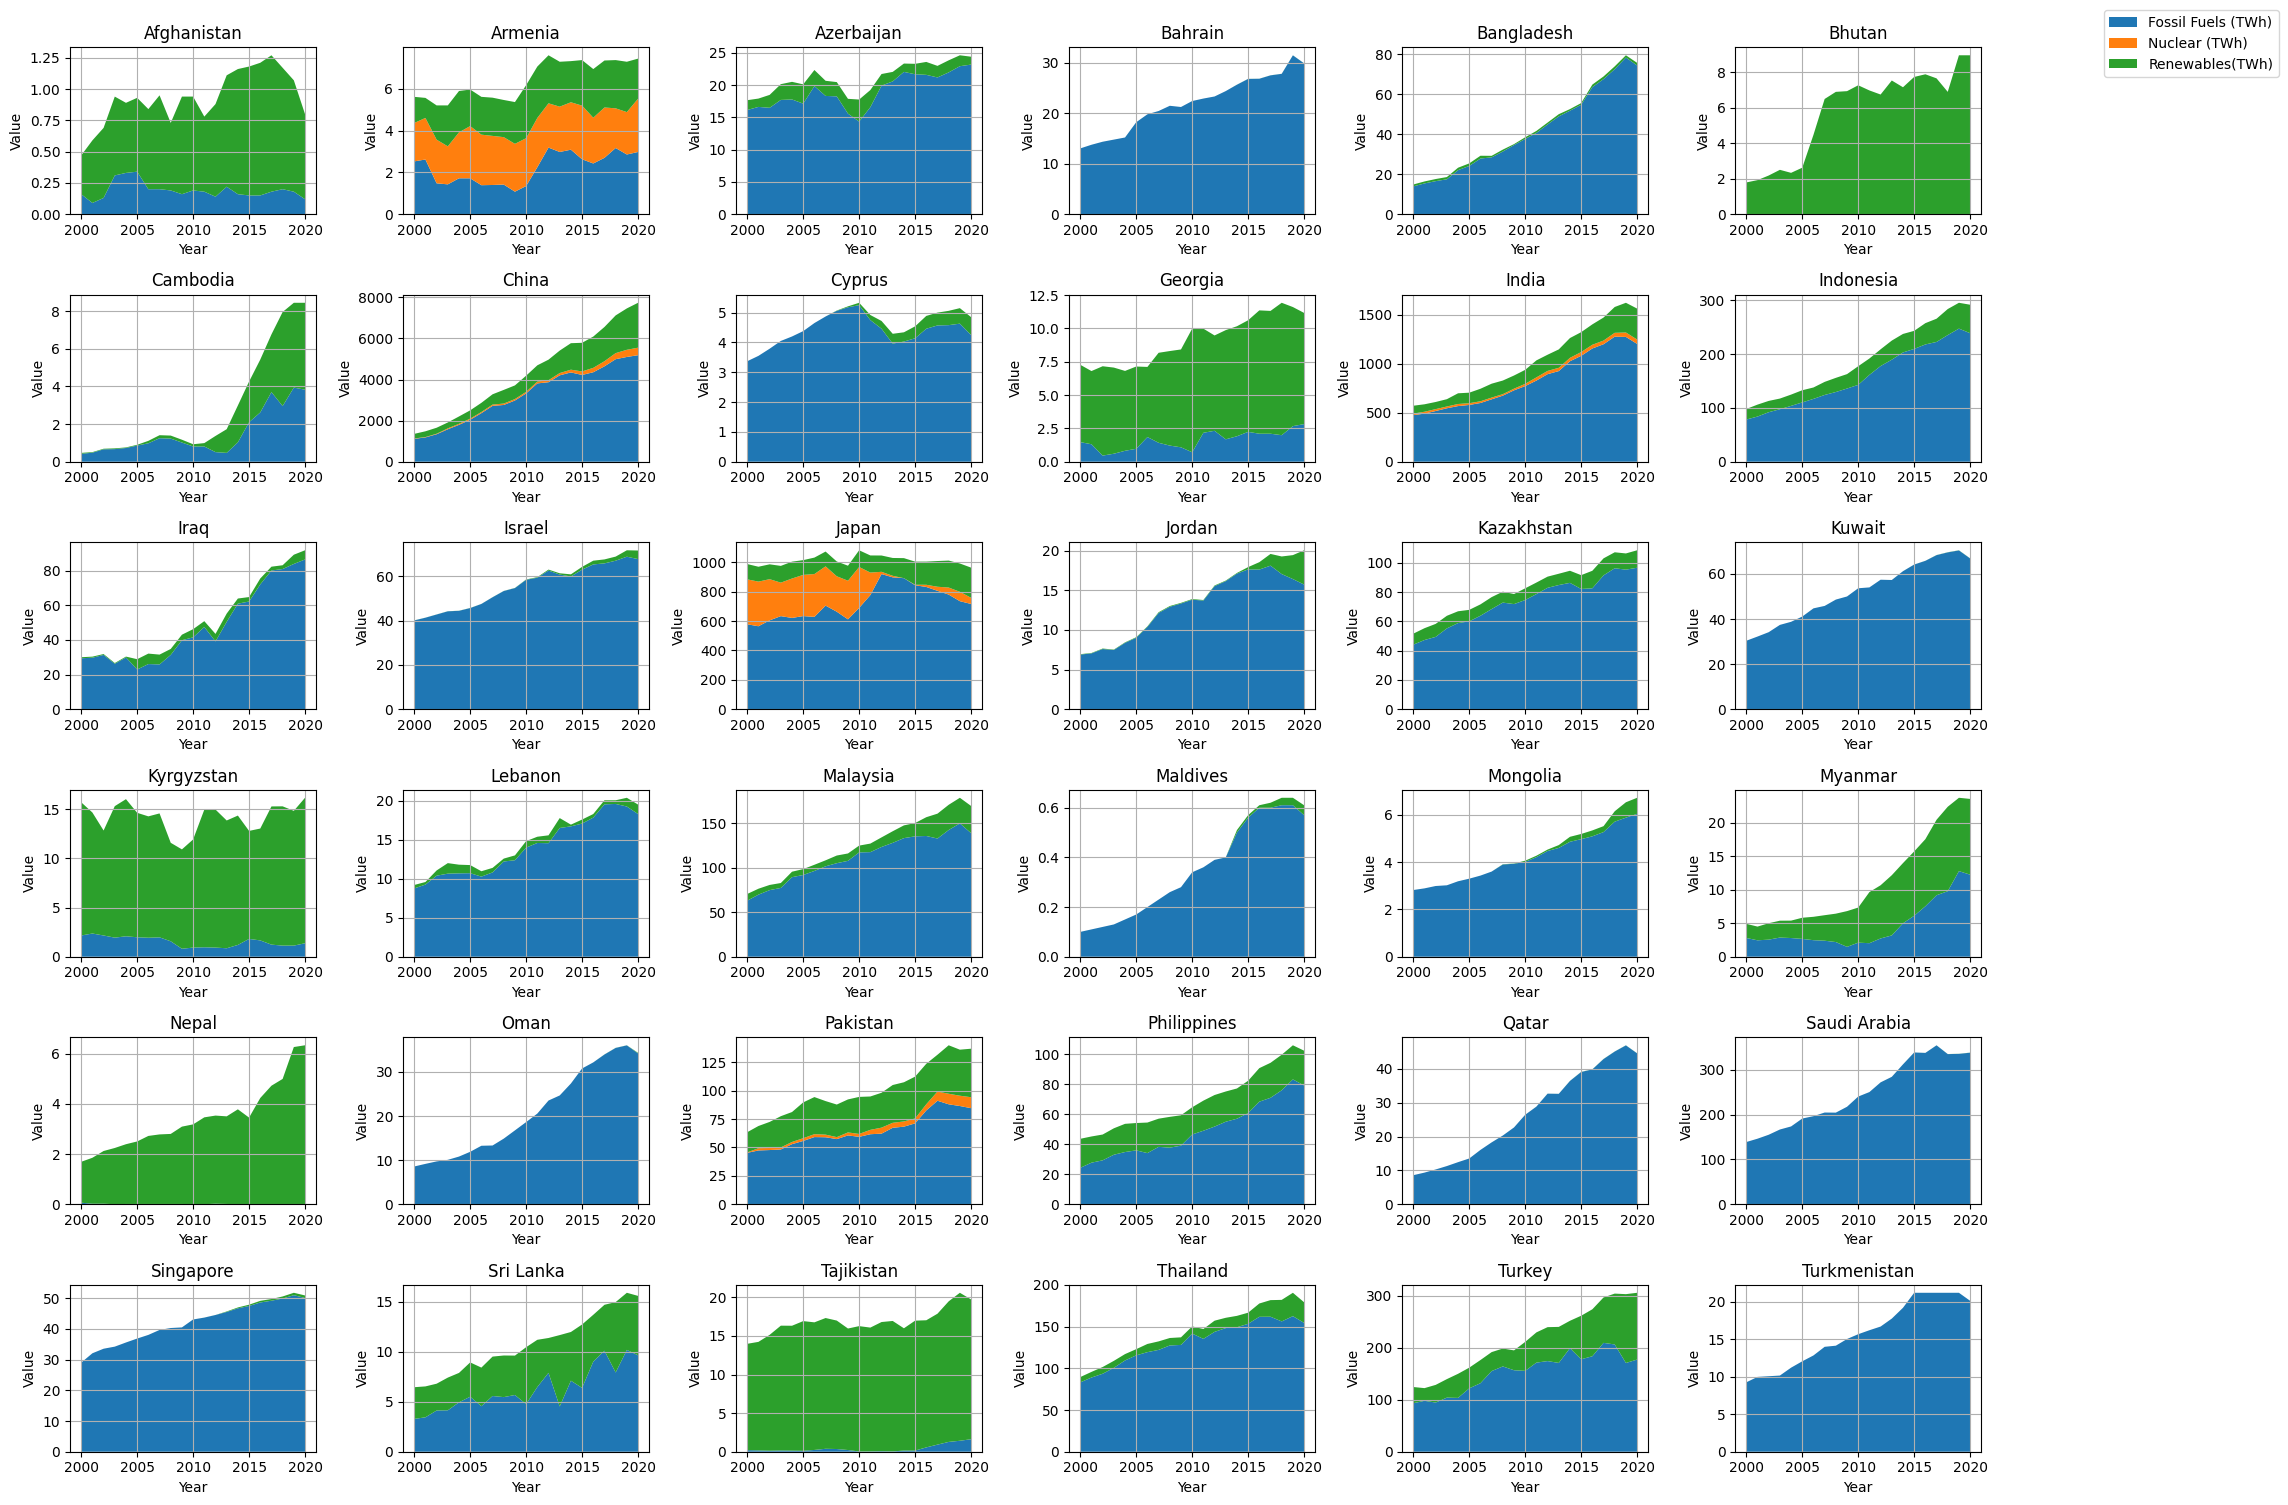

In [31]:
# Select relevant columns for CO2 emissions and electricity generation from different sources
co2_emissions = Asia_df['Value_co2_emissions_kt_by_country']
electricity_fossil_fuels = Asia_df['Electricity from fossil fuels (TWh)']
electricity_nuclear = Asia_df['Electricity from nuclear (TWh)']
electricity_renewables = Asia_df['Electricity from renewables (TWh)']


# Set up the subplot layout
num_rows = 6  # Number of rows of subplots
num_cols = 6  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    if country in Asia_df.index:
        country_data = Asia_df.loc[country]
        years = country_data.index.get_level_values('Year')
        # Stack the energy sources vertically
        stacked_data = np.vstack([electricity_fossil_fuels.loc[country], electricity_nuclear.loc[country], electricity_renewables.loc[country]])
        # Plot the stacked area chart
        axes[row, col].stackplot(years, stacked_data, labels=['Fossil Fuels (TWh)', 'Nuclear (TWh)', 'Renewables(TWh)'])
        axes[row, col].set_title(f'{country}')
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('Value')
        axes[row, col].grid(True)

# Create a single legend for all the subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()

 This above graph shows how much each country have the contribution of different energy sources to its total electricity production over time. It also that most of the developed and developing nations are mostly relying on fossil fules. Also the countries with 100 % electricity excess are heavily relying on fossil fuels. Some of the countries like Kyrgyzstan, Nepal, Bhutan
 Afghanistan are relying renewal fules for the electricity generation

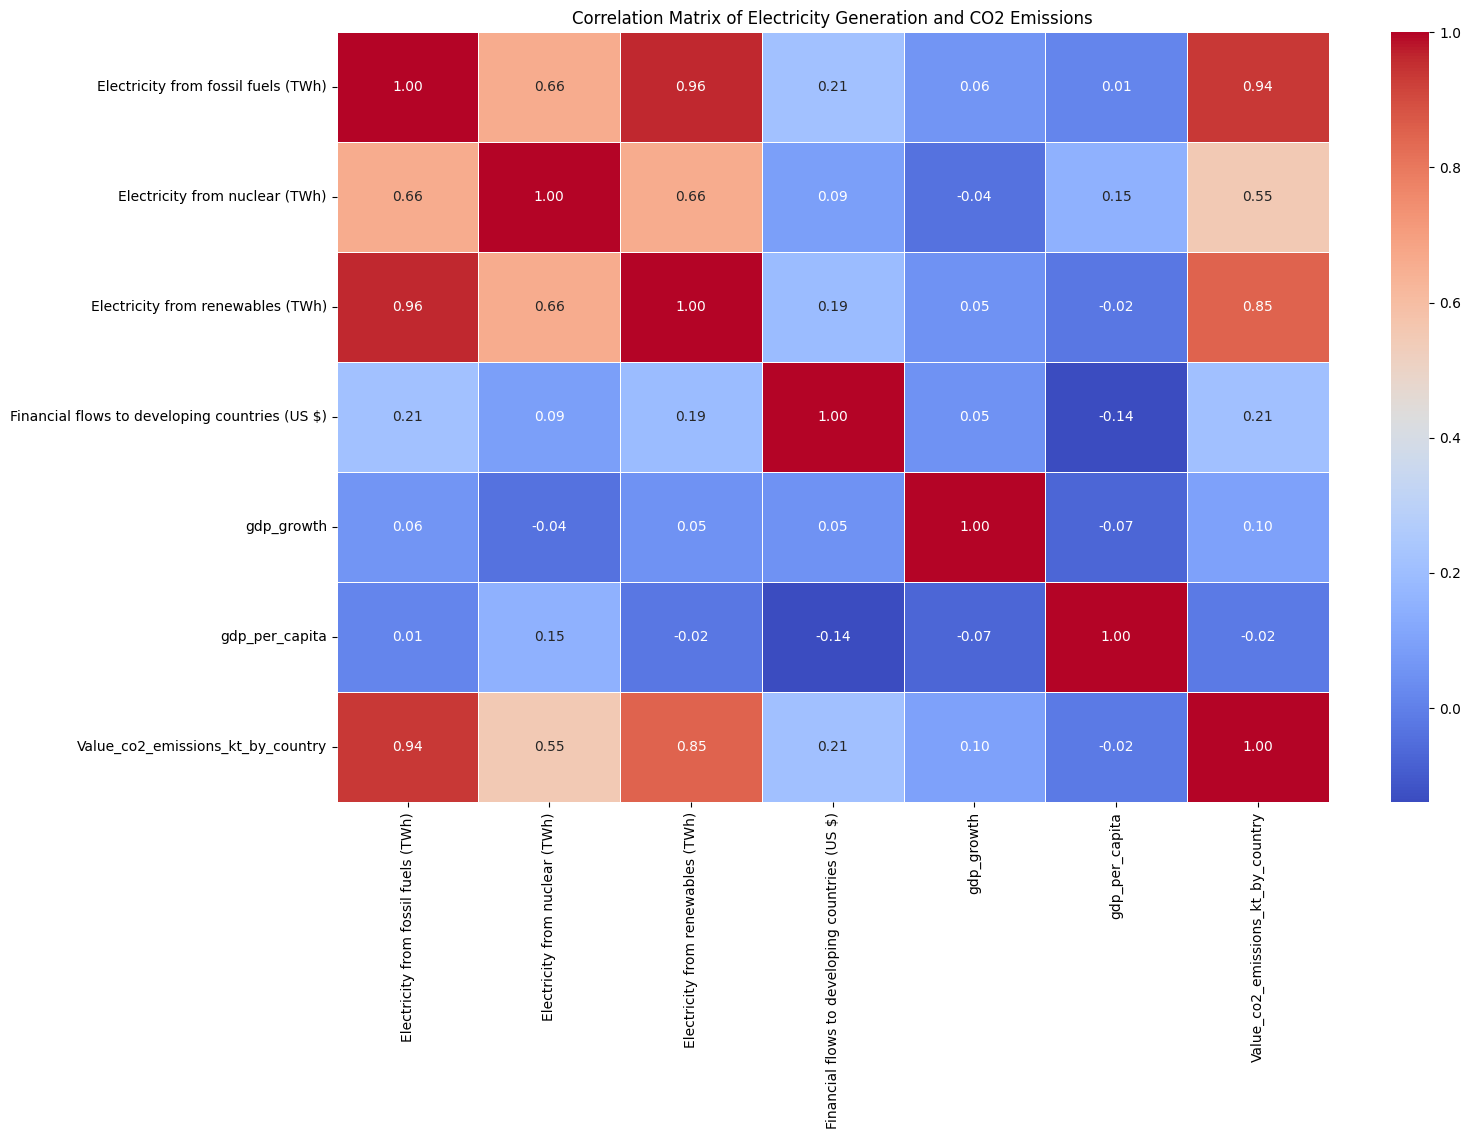

In [32]:
# Select relevant columns for analysis
relevant_data =  Asia_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Financial flows to developing countries (US $)', 'gdp_growth', 'gdp_per_capita'
                       ,'Value_co2_emissions_kt_by_country']]

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Electricity Generation and CO2 Emissions')
plt.show()

The correlation matrix shows the relationships between various variables related to electricity generation sources, CO2 emissions, financial flows to developing countries, and economic indicators like GDP growth and GDP per capita.

  * Electricity generation from fossil fuels is highly positively correlated (0.94), moderately correlated from nuclear sources (0.85),
 less moderately correlated (0.55) with renewables, to total CO2 emissions by country. This suggests fossil fuels are a major driver of CO2 emissions.
  * GDP growth has a negligible to slightly negative correlation with most variables, showing small positive correlation (0.10) with financial flows, that suggests growth may not directly relate to electricity mix or emissions.

  * The negative correlation (-0.70) between GDP growth and GDP per capita, inidates potential challenges in balancing growth and income distribution

In [33]:

# Select the required features and target values
X_data = Asia_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]
y_data = Asia_df['Value_co2_emissions_kt_by_country']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
# (You can use metrics like mean squared error, R-squared, etc.)
print('Model Coefficients for Asian data :', model.coef_)
print('Model Intercept Asian data:', model.intercept_)

Model Coefficients for Asian data : [ 2704.54573939 -1783.64009849 -1064.33341351]
Model Intercept Asian data: -45481.16916626948


This model coefficients indicate that for the Asian countries, elctricity generation from Nuclear and Renewal sources have inverse effect on CO₂ emission. But the electricity generation from fossil fules have positive effect on CO₂ emission.

In [34]:
# Calculate the Mean Squared Error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 =  r2_score(y_test, y_pred)

print(f"Mean Squared Error Asian data: {mse}")
print(f"R-squared: {r2}")


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE) Asian data:", rmse)

Mean Squared Error Asian data: 396984990458.2904
R-squared: 0.7223382481582331
Root Mean Squared Error (RMSE) Asian data: 630067.4491340513


In [35]:
# Initializing Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Training the Random Forest model
rf_regressor.fit(X_train, y_train)
# Predicting on the test set
rf_predictions = rf_regressor.predict(X_test)


# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
# Calculate R-squared (R²)
r2 = r2_score(y_test, rf_predictions)
print("R-squared (R²):", r2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate  Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Random Forest Mean Squared Error: 341564756263.001
R-squared (R²): 0.7611006187364775
Mean Absolute Error (MAE): 67164.90525945261
Root Mean Squared Error (RMSE): 584435.4166740761


European Countries

In [36]:
# Define a list of European countries

european_countries = ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', "Bulgaria",
'Croatia','Czech Republic','Denmark','Estonia', 'Finland', 'France', 'Germany','Greece','Hungary',
'Iceland', 'Ireland', 'Italy','Latvia','Lithuania','Luxembourg','Malta',
'Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russia',
'Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom']


# Filter the DataFrame to include only European countries
europe_df = Energy_df[Energy_df['Entity'].isin(european_countries)].copy()

# Save the European DataFrame to a file
europe_df.to_csv('europe_data.csv', index=False)


Europe_df = pd.read_csv("/content/europe_data.csv")
Europe_df.head()

Entity  Year  Access to electricity (% of population)  \
0  Albania  2000                                    100.0   
1  Albania  2001                                    100.0   
2  Albania  2002                                    100.0   
3  Albania  2003                                    100.0   
4  Albania  2004                                    100.0   

   Access to clean fuels for cooking  \
0                               38.2   
1                               40.5   
2                               43.2   
3                               46.4   
4                               49.0   

   Renewable-electricity-generating-capacity-per-capita  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   Financial flows to developing countries (US $)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.14                             0.0   
1                                 0.13                             0.0   
2                                 0.16                             0.0   
3                                 0.10                             0.0   
4                                 0.13                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               4.55                               97.014930   
1                               3.52                               96.438354   
2                               3.48                               95.604390   
3                               5.12                               98.084300   
4                               5.41                               97.653430   

   Primary energy consumption per capita (kWh/person)  \
0                                          9029.4375    
1                                          8635.5320    
2                                          9443.5550    
3                                         10756.6120    
4                                         11586.9510    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               4.13             
1                                               3.89             
2                                               4.10             
3                                               3.80             
4                                               3.96             

   Value_co2_emissions_kt_by_country  \
0                        3170.000000   
1                        3230.000000   
2                        3759.999990   
3                        4070.000172   
4                        4250.000000   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN    6.946217     1126.683340   
1                                       NaN    8.293313     1281.659826   
2                                       NaN    4.536524     1425.124219   
3                                       NaN    5.528637     1846.120121   
4            

In [37]:
# Set 'Entity' and 'Year' columns as index
Europe_df.set_index(['Entity', 'Year'], inplace=True)
Europe_df.head()

Access to electricity (% of population)  \
Entity  Year                                            
Albania 2000                                    100.0   
        2001                                    100.0   
        2002                                    100.0   
        2003                                    100.0   
        2004                                    100.0   

              Access to clean fuels for cooking  \
Entity  Year                                      
Albania 2000                               38.2   
        2001                               40.5   
        2002                               43.2   
        2003                               46.4   
        2004                               49.0   

              Renewable-electricity-generating-capacity-per-capita  \
Entity  Year                                                         
Albania 2000                                                NaN      
        2001                                                NaN      
        2002                                                NaN      
        2003                                                NaN      
        2004                                                NaN      

              Financial flows to developing countries (US $)  \
Entity  Year                                                   
Albania 2000                                             NaN   
        2001                                             NaN   
        2002                                             NaN   
        2003                                             NaN   
        2004                                             NaN   

              Renewable energy share in the total final energy consumption (%)  \
Entity  Year                                                                     
Albania 2000                                                NaN                  
        2001                                                NaN                  
        2002                                                NaN                  
        2003                                                NaN                  
        2004                                                NaN                  

              Electricity from fossil fuels (TWh)  \
Entity  Year                                        
Albania 2000                                 0.14   
        2001                                 0.13   
        2002                                 0.16   
        2003                                 0.10   
        2004                                 0.13   

              Electricity from nuclear (TWh)  \
Entity  Year                                   
Albania 2000                             0.0   
        2001                             0.0   
        2002                             0.0   
        2003                             0.0   
        2004                             0.0   

              Electricity from renewables (TWh)  \
Entity  Year                                      
Albania 2000                               4.55   
        2001                               3.52   
        2002                               3.48   
        2003                               5.12   
        2004                               5.41   

              Low-carbon electricity (% electricity)  \
Entity  Year                                           
Albania 2000                               97.014930   
        2001                               96.438354   
        2002                               95.604390   
        2003                               98.084300   
        2004                               97.653430   

              Primary energy consumption per capita (kWh/person)  \
Entity  Year                                                       
Albania 2000                                          9029.4375    
        2001                                          8635.5320    
        2

In [38]:
# Fill NaN in each column by 0
Europe_df.fillna(0, inplace=True);

Europe_df.dropna(axis = 1);

# check missing values in columns
Europe_df.isnull().sum()

Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)                            0
gdp_growth                                                          0
gdp_per_capita      

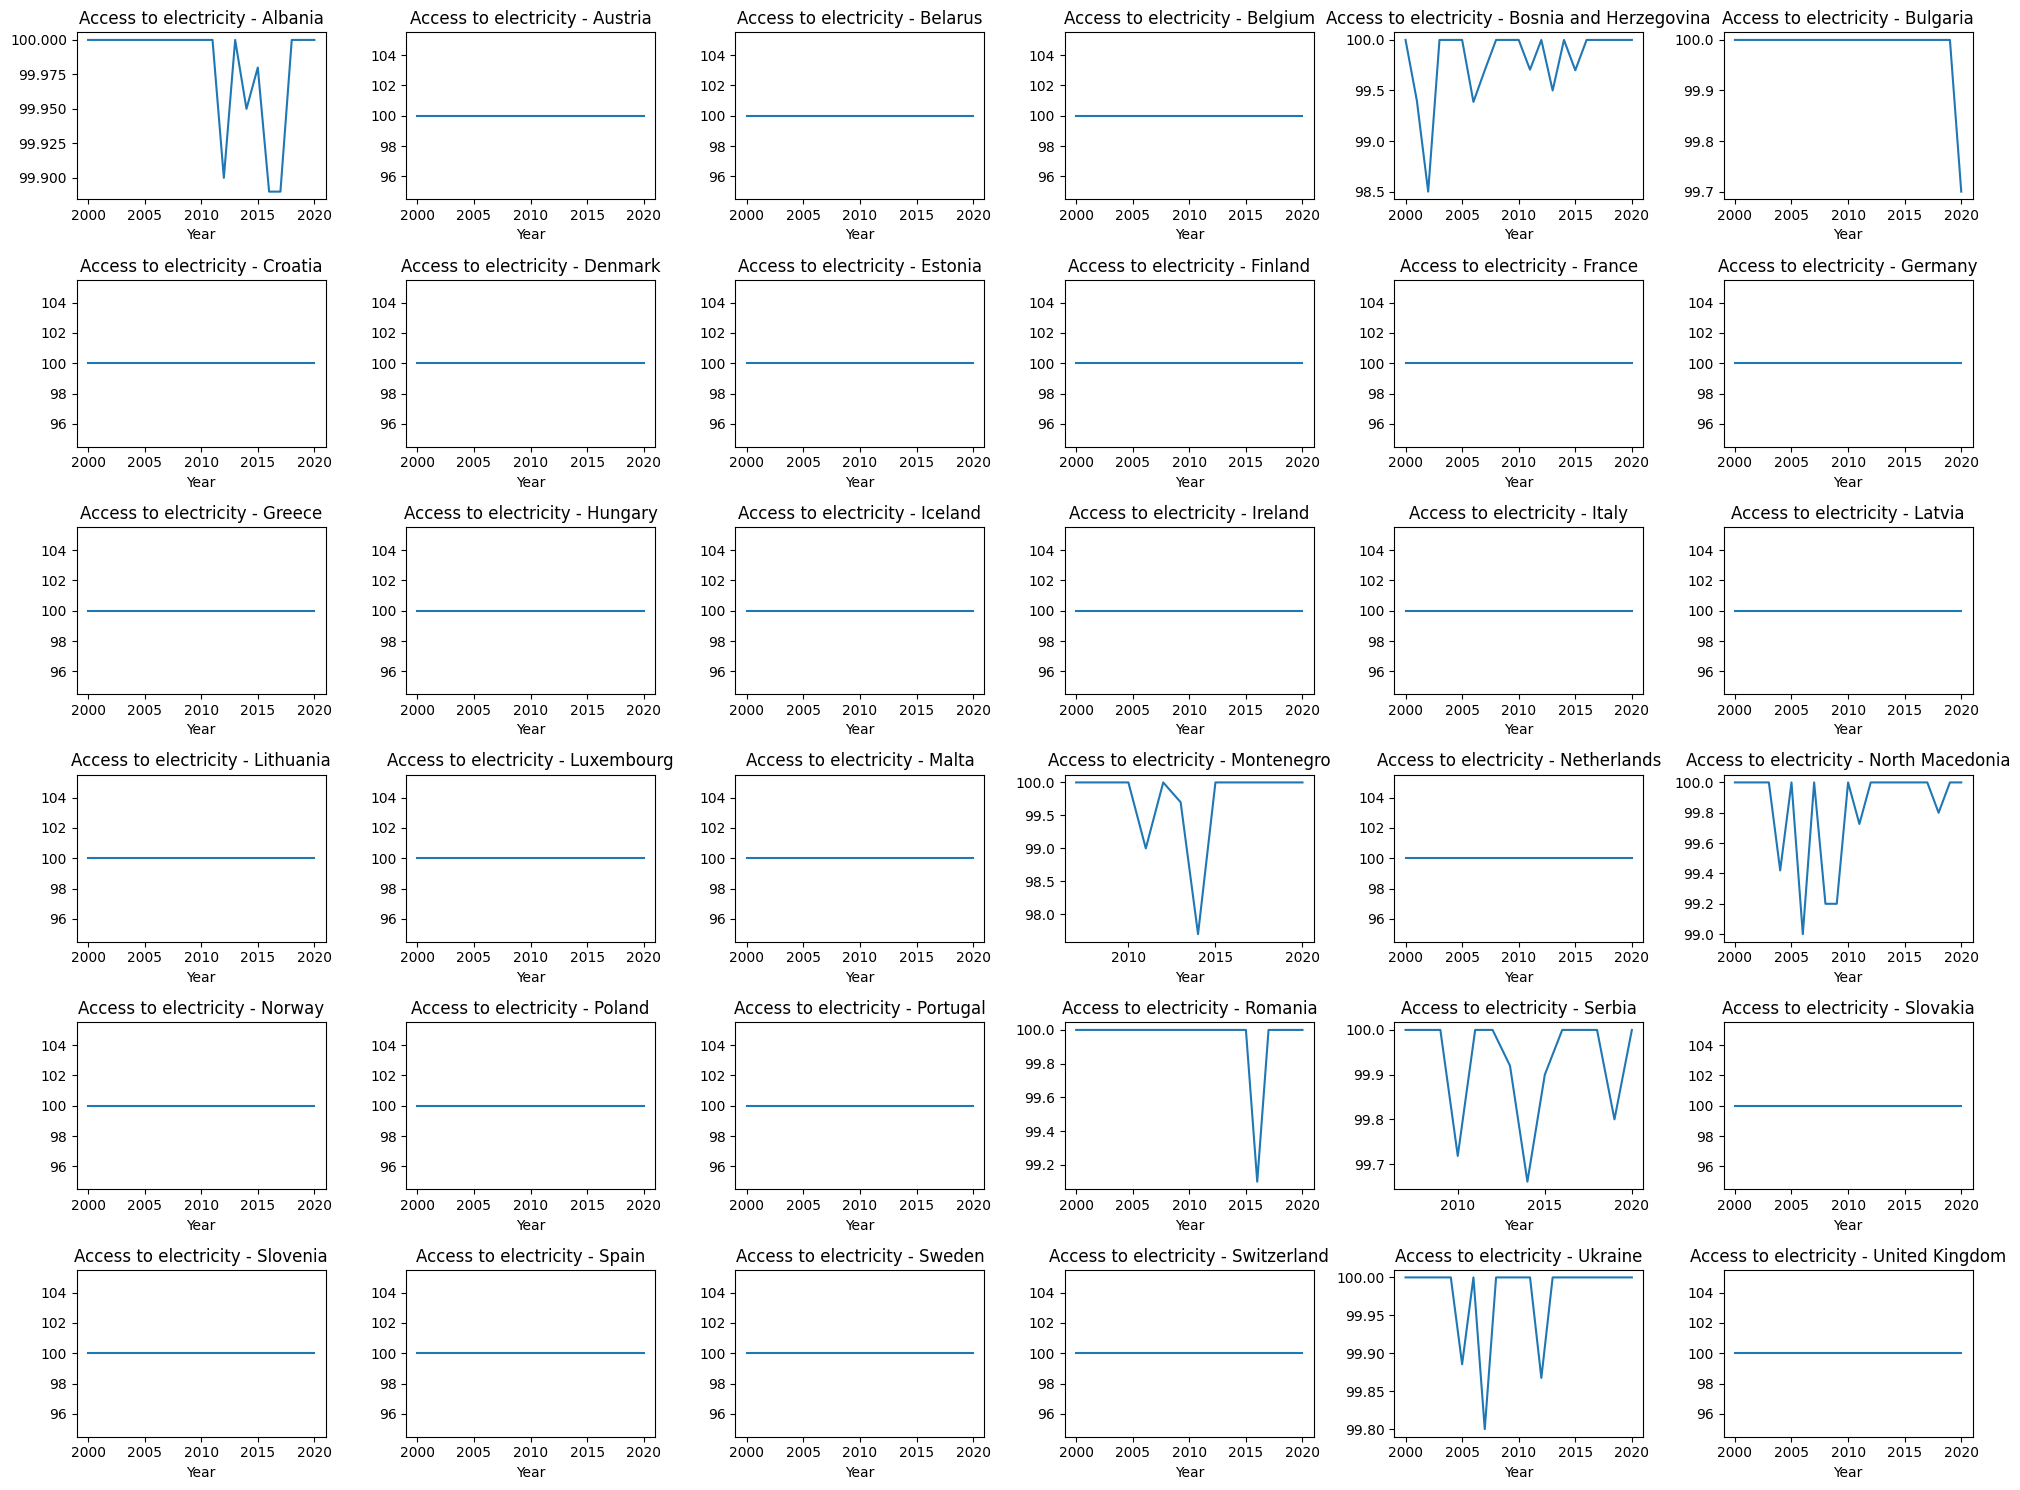

In [39]:
access_to_electricity = Europe_df['Access to electricity (% of population)']
# Select unique countries from the index
countries = access_to_electricity.index.get_level_values('Entity').unique()

# Set up the subplot layout
num_rows = 6  # Number of rows of subplots
num_cols = 6  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    country_data = access_to_electricity.loc[country]
    if num_rows == 1 or num_cols == 1:
        country_data.plot(kind='line', ax=axes[i], title=f'Access to electricity - {country}')
    else:
        country_data.plot(kind='line', ax=axes[row, col], title=f'Access to electricity - {country}')

# Adjust layout
plt.tight_layout()
plt.show()

From the graph above we can conclude that most of the countries in Europe have full excess to electricity, except some countries where we can see negligibly small fluctuations indicating countries in Europe have good excess from very long time.

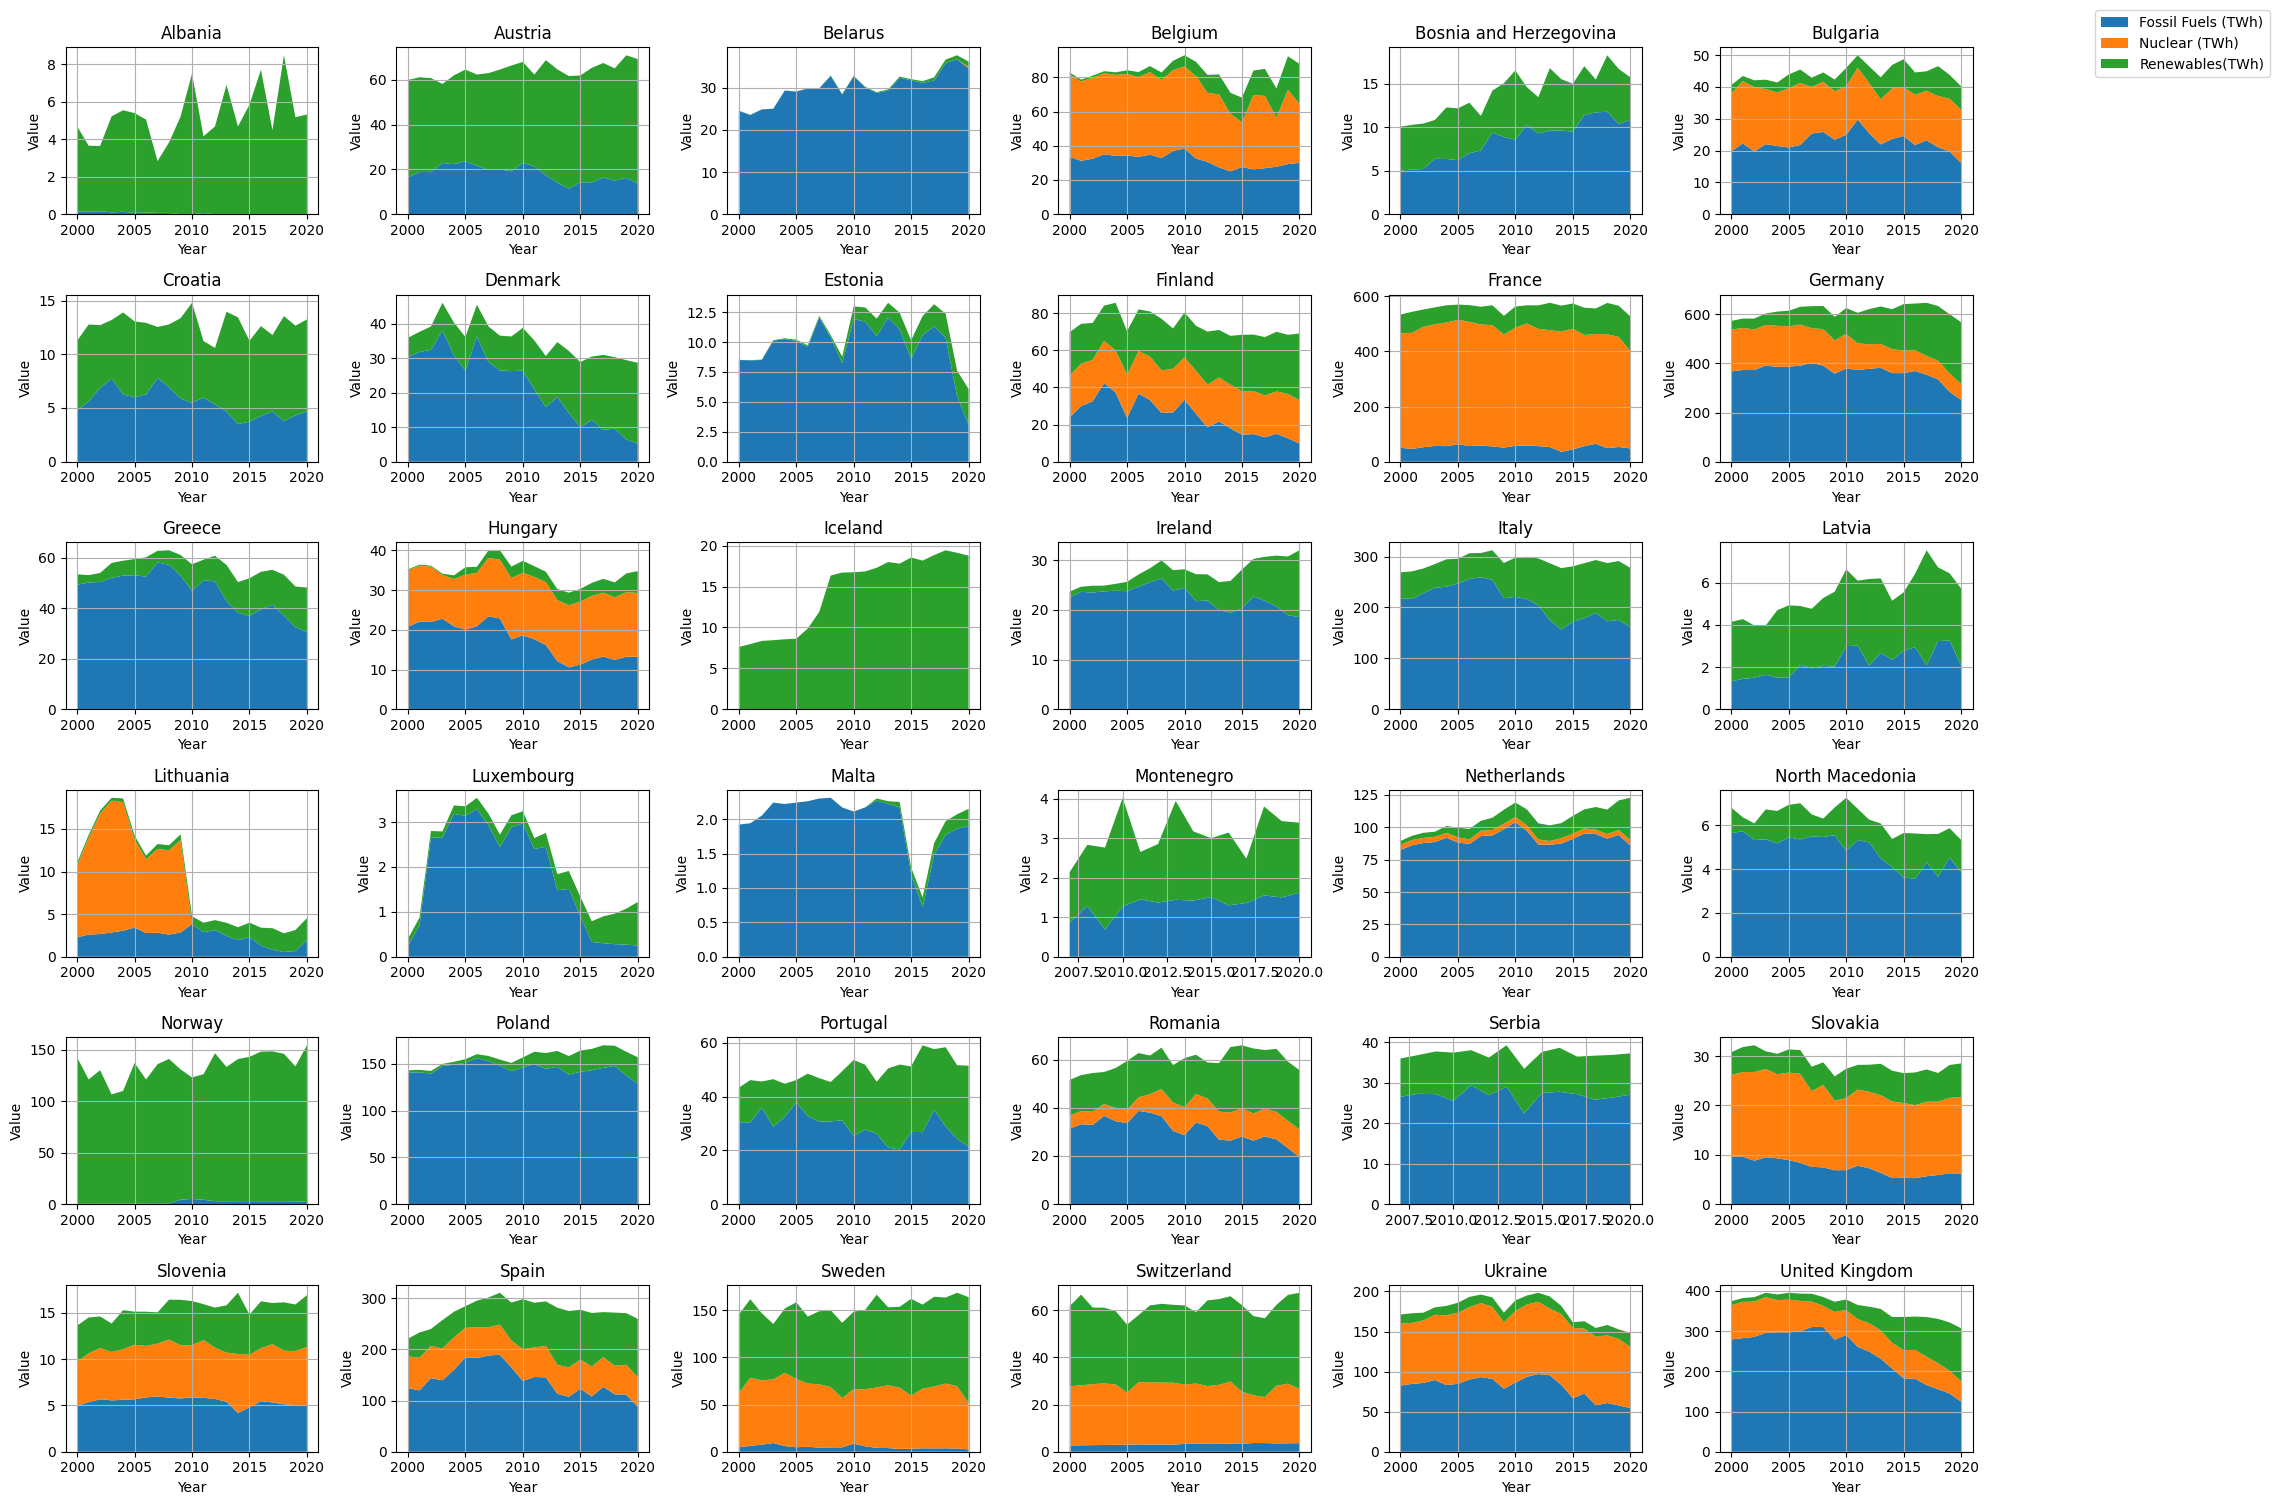

In [40]:
# Select relevant columns for CO2 emissions and electricity generation from different sources
co2_emissions = Europe_df['Value_co2_emissions_kt_by_country']
electricity_fossil_fuels = Europe_df['Electricity from fossil fuels (TWh)']
electricity_nuclear = Europe_df['Electricity from nuclear (TWh)']
electricity_renewables = Europe_df['Electricity from renewables (TWh)']


# Set up the subplot layout
num_rows = 6  # Number of rows of subplots
num_cols = 6  # Number of columns of subplots
num_plots = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plotting for each country
for i, country in enumerate(countries[:num_plots]):
    row = i // num_cols
    col = i % num_cols
    if country in Europe_df.index:
        country_data = Europe_df.loc[country]
        years = country_data.index.get_level_values('Year')
        # Stack the energy sources vertically
        stacked_data = np.vstack([electricity_fossil_fuels.loc[country], electricity_nuclear.loc[country], electricity_renewables.loc[country]])
        # Plot the stacked area chart
        axes[row, col].stackplot(years, stacked_data, labels=['Fossil Fuels (TWh)', 'Nuclear (TWh)', 'Renewables(TWh)'])
        axes[row, col].set_title(f'{country}')
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('Value')
        axes[row, col].grid(True)

# Create a single legend for all the subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()

Several countrie's, like as Norway, Iceland, Sweden, and Switzerland, have a significant share of electricity generation from renewables, likely due to their hydropower resources and emphasis on sustainable energy.
Countries like France, Belgium, and Ukraine have a substantial nuclear component in their electricity mix, indicating their historical investments in nuclear power infrastructure.
Fossil fuels remain a dominant source of electricity generation for many European nations, though some countries like the United Kingdom and Germany have made efforts to transition towards cleaner sources over the years.

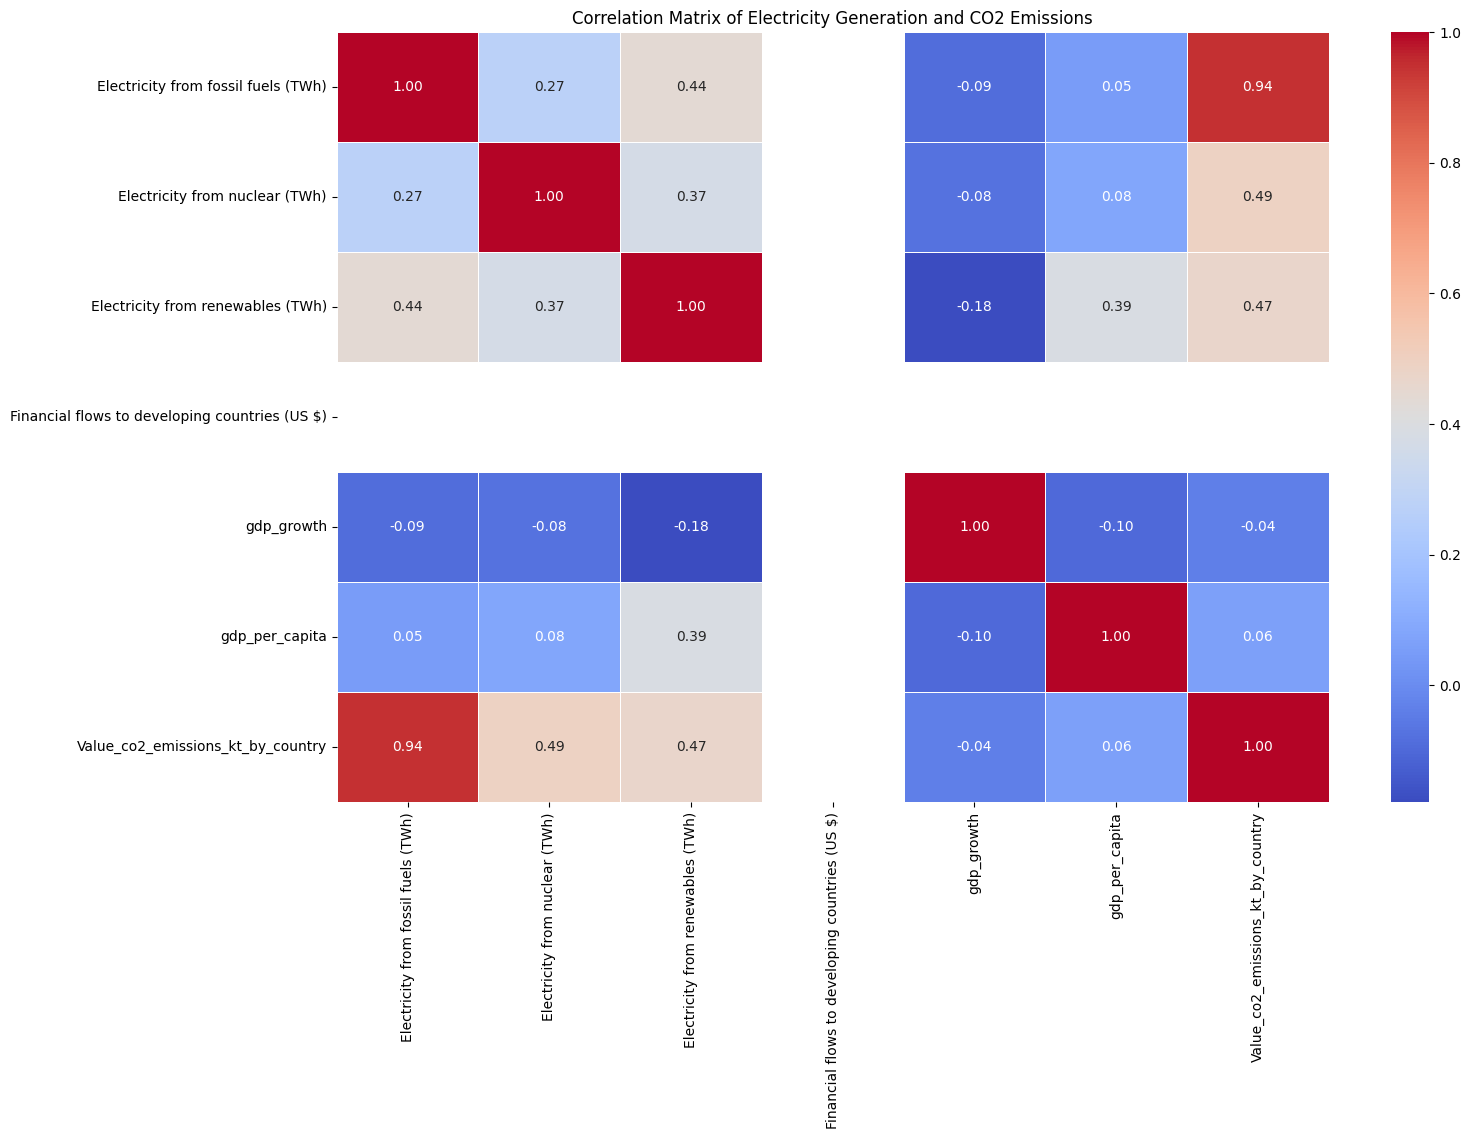

In [41]:
# Select relevant columns for analysis
relevant_data =  Europe_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Financial flows to developing countries (US $)', 'gdp_growth', 'gdp_per_capita'
                       ,'Value_co2_emissions_kt_by_country']]


# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Electricity Generation and CO2 Emissions')
plt.show()

* There is a strong positive correlation (0.94) between electricity generation from fossil fuels and total CO2 emissions by country. This is expected as fossil fuel combustion is a major contributor to greenhouse gas emissions. In contrast, renewable electricity generation exhibits a moderate positive correlation (0.47) with emissions, likely due to the residual reliance on non-renewable sources in many countries.
*  GDP growth displays a weak negative correlation with all electricity generation sources, suggesting that economic growth may not directly related with increased electricity production in the given data sample.
*  GDP per capita shows a slight positive correlation with electricity from renewables (0.39), implying that wealthier nations may prioritize investment in clean energy sources.
* The correlation between financial flows to developing countries and electricity generation sources is mostly weak, with the positive correlation observed with renewables (0.44). This could indicate some link between aid programs and renewable energy projects in developing economies.

In [42]:
# Select the required features and target values
X_data = Europe_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]
y_data = Europe_df['Value_co2_emissions_kt_by_country']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)

# Create and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
# (You can use metrics like mean squared error, R-squared, etc.)
print('Model Coefficients for Europe data :', model.coef_)
print('Model Intercept Europe data:', model.intercept_)

Model Coefficients for Europe data : [1799.96574346  561.84445698 -177.37769508]
Model Intercept Europe data: 7385.190645998897


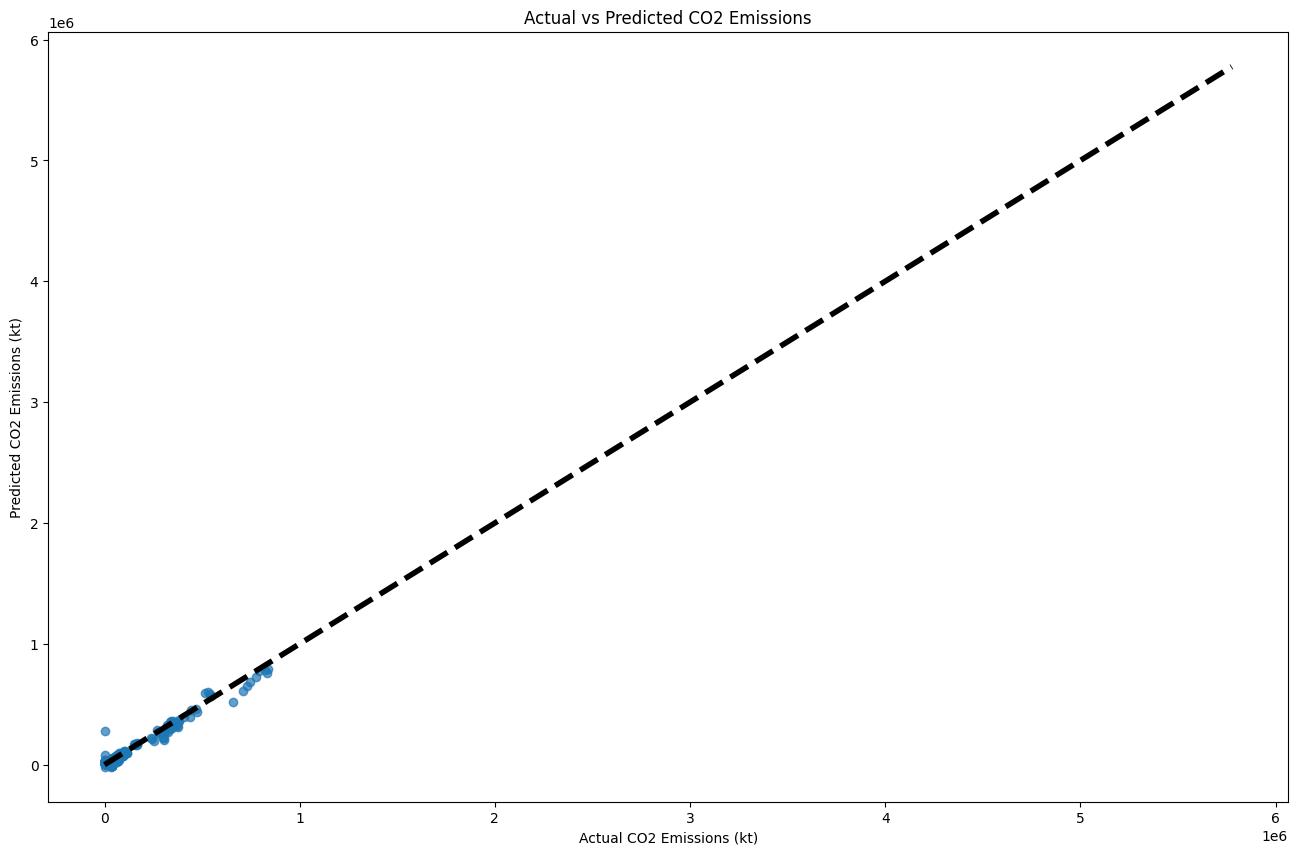

In [43]:
# Plotting actual vs predicted values
plt.figure(figsize=(16, 10))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual CO2 Emissions (kt)')
plt.ylabel('Predicted CO2 Emissions (kt)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

In [44]:
# Calculate the Mean Squared Error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 =  r2_score(y_test, y_pred)

print(f"Mean Squared Error Asian data: {mse}")
print(f"R-squared: {r2}")


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE) Asian data:", rmse)

Mean Squared Error Asian data: 902622519.3142585
R-squared: 0.9688854265701723
Root Mean Squared Error (RMSE) Asian data: 30043.6768607682


In [45]:
# Initializing Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Training the Random Forest model
rf_regressor.fit(X_train, y_train)
# Predicting on the test set
rf_predictions = rf_regressor.predict(X_test)


# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
# Calculate R-squared (R²)
r2 = r2_score(y_test, rf_predictions)
print("R-squared (R²):", r2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate  Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Random Forest Mean Squared Error: 1218390929.9647906
R-squared (R²): 0.9580004783334828
Mean Absolute Error (MAE): 11358.713379156494
Root Mean Squared Error (RMSE): 34905.457022717674


From the over all analysis of the given data and the calculations done using different machine learning models. And finding the different metric values like MSE, R-Square value, RMSE a conclusion can be drawn for this dataset as follows.

1. Countries highly relying on fossil fules are generating high co2 emission as compared to nuclear and renewal sources. This is expected as fossil fuel combustion is a major contributor to greenhouse gas emissions
2. Countries relying on renewable  and nuclear electricity generation exhibits a moderately positive to highly positive co2 emission, this could be due to several factors:
              

  *   Transition Phase: Countries may still be in the process of transition from fossil fuels to renewable and nuclear sources. During this phase, they may still have to rely significantly on fossil fuels.
  *  Other Emission Sources: Co2 emissions might have occured beyond just electricity generation, like transportation, industry etc.
  * Others factors:: Other factors like population size, energy efficiency, econonic activities and environmental policies.

But over all we can conclude from the calculation that being able to switch to nuclear nad renewal will play a crucial role in environmental impact particularly in terms of Co2 emissions.



